In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import f1_score, classification_report
from sklearn.metrics import confusion_matrix

#### LoanTap is an online platform committed to delivering customized loan products to millennials. They innovate in an otherwise dull loan segment, to deliver instant, flexible loans on consumer friendly terms to salaried professionals and businessmen.The data science team at LoanTap is building an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.

In [2]:
df=pd.read_csv("d2beiqkhq929f0.cloudfront.net_public_assets_assets_000_003_549_original_logistic_regression.csv_1651045921.txt")

In [3]:
y=df['loan_status']
X=df.drop(columns=['loan_status'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y ,random_state=42)


#### we will keep test data isolated from the training and validation data , we use stratified split to keep the ratio of class 1 and class 0 same.

In [4]:
df_eda=X_train.copy()

In [5]:
df_eda['loan_status']=y_train

In [6]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316824 entries, 379004 to 7902
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             316824 non-null  float64
 1   term                  316824 non-null  object 
 2   int_rate              316824 non-null  float64
 3   installment           316824 non-null  float64
 4   grade                 316824 non-null  object 
 5   sub_grade             316824 non-null  object 
 6   emp_title             298538 non-null  object 
 7   emp_length            302283 non-null  object 
 8   home_ownership        316824 non-null  object 
 9   annual_inc            316824 non-null  float64
 10  verification_status   316824 non-null  object 
 11  issue_d               316824 non-null  object 
 12  purpose               316824 non-null  object 
 13  title                 315426 non-null  object 
 14  dti                   316824 non-null  float64
 1

#### we have 27 columns in total , some columns have null in it , we will handle it later part 

In [7]:
df_eda.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,316824.000000,316824.000000,316824.000000,3.168240e+05,316824.000000,316824.000000,316824.000000,3.168240e+05,316604.000000,316824.000000,286617.000000,316387.000000
mean,14121.259043,13.644967,432.119451,7.428983e+04,17.347766,11.316441,0.178762,1.585613e+04,53.812772,25.428683,1.813357,0.121841
std,8368.044418,4.475089,251.099213,6.356200e+04,8.624197,5.140178,0.535504,2.067522e+04,24.457802,11.888294,2.147043,0.357005
min,500.000000,5.320000,16.080000,6.000000e+02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.027000e+03,35.900000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.470000,6.400000e+04,16.910000,10.000000,0.000000,1.119100e+04,54.850000,24.000000,1.000000,0.000000
75%,20000.000000,16.550000,568.420000,9.000000e+04,22.980000,14.000000,0.000000,1.962400e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,1622.000000,76.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


#### data describing --> min , max , median counts etc

### EDA - (univarient and bi varient analysis)

### Loan amount 

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

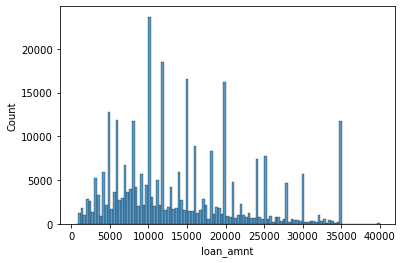

In [8]:
sns.histplot(df_eda['loan_amnt'])

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

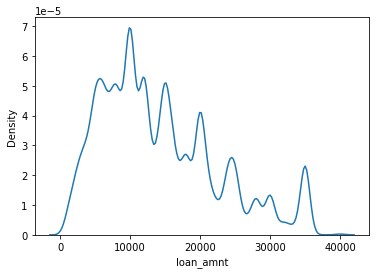

In [9]:
sns.kdeplot(df_eda['loan_amnt'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan_amnt'>

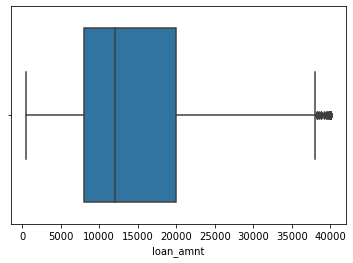

In [10]:
sns.boxplot(df_eda['loan_amnt'])

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

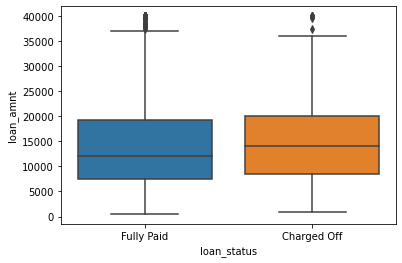

In [11]:
sns.boxplot(data=df_eda,y='loan_amnt',x='loan_status',orient='v')

<AxesSubplot:xlabel='loan_amnt', ylabel='Density'>

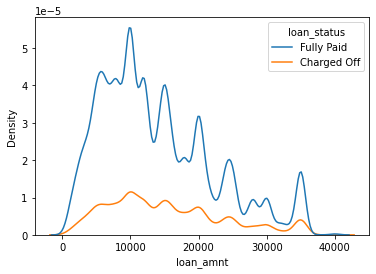

In [12]:
sns.kdeplot(df_eda['loan_amnt'],hue=df_eda['loan_status'])

In [13]:
print(df_eda['loan_amnt'].max(),df_eda['loan_amnt'].min())

40000.0 500.0


In [14]:
df_eda['loan_amnt'].groupby(df_eda['loan_status']).sum()

loan_status
Charged Off    9.407867e+08
Fully Paid     3.533167e+09
Name: loan_amnt, dtype: float64

#### we have checked max and min value of the loan amount , 
#### loan amount for both Fully Paid and Charged off looks silimar ie similar dristribution ,similar median values .
#### there is some outliers 
#### sum of loan amount given to fully paid is higher than charged off customers

### Term

In [15]:
df_eda['term'].value_counts()

 36 months    241633
 60 months     75191
Name: term, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

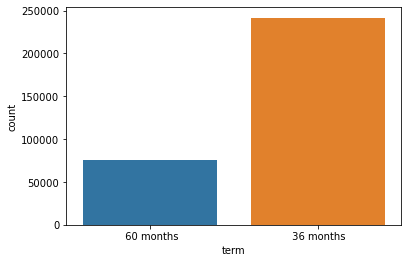

In [16]:
sns.countplot(df_eda['term'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='term', ylabel='count'>

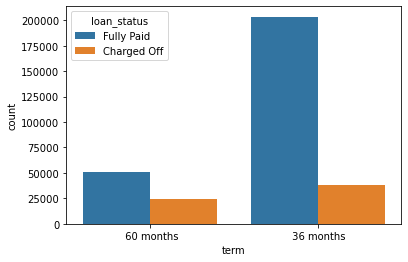

In [17]:
sns.countplot(df_eda['term'],hue=df_eda['loan_status'])

#### maximum customers have taken 36 months term , since there is a imablance in the target class , we find that fully paid have more count than charged off in both 36 and 60 months term

### Intrest rate 

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

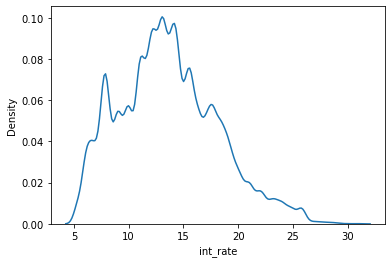

In [18]:
sns.kdeplot(df_eda['int_rate'])

<AxesSubplot:xlabel='int_rate', ylabel='Count'>

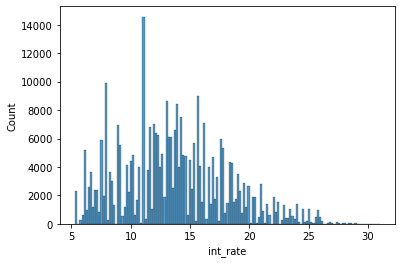

In [19]:
sns.histplot(df_eda['int_rate'])

<AxesSubplot:xlabel='int_rate', ylabel='Density'>

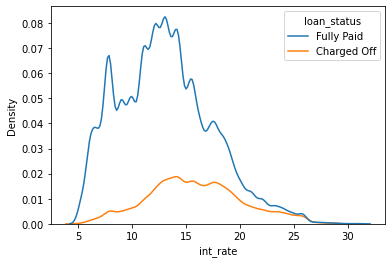

In [20]:
sns.kdeplot(df_eda['int_rate'],hue=df_eda['loan_status'])

<AxesSubplot:xlabel='loan_status', ylabel='int_rate'>

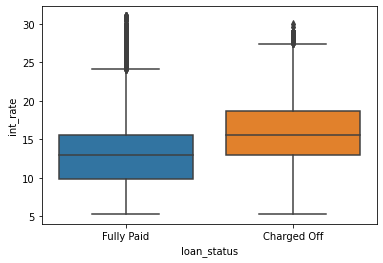

In [21]:
sns.boxplot(data=df_eda,y='int_rate',x='loan_status',orient='v')

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='int_rate'>

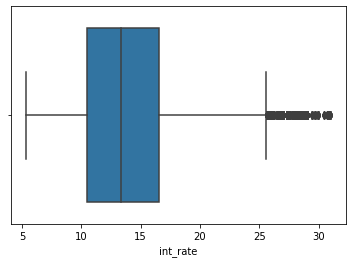

In [22]:
sns.boxplot(df_eda['int_rate'])

#### we have checked max and min value of the interest rate, 
#### interest rate for both Fully Paid and Charged off looks silimar ie similar dristribution
#### customers how are defauters (charged off ) have sltightly high interest rate than Fully paid 
#### there is some outliers 

### Installments 

<AxesSubplot:xlabel='installment', ylabel='Density'>

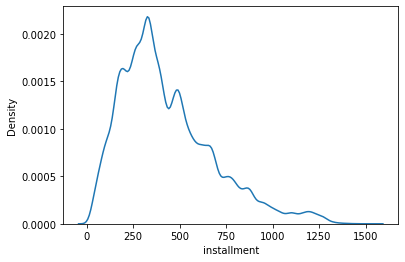

In [23]:
sns.kdeplot(df_eda['installment'])

<AxesSubplot:xlabel='installment', ylabel='Count'>

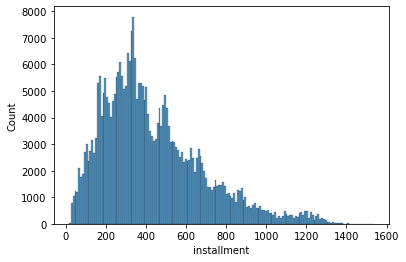

In [24]:
sns.histplot(df_eda['installment'])

<AxesSubplot:xlabel='installment', ylabel='Density'>

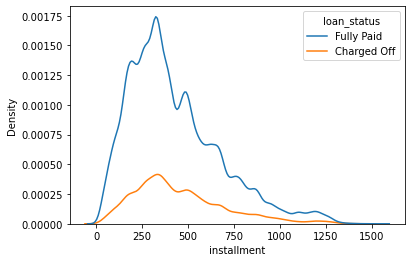

In [25]:
sns.kdeplot(df_eda['installment'],hue=df_eda['loan_status'])

<AxesSubplot:xlabel='loan_status', ylabel='installment'>

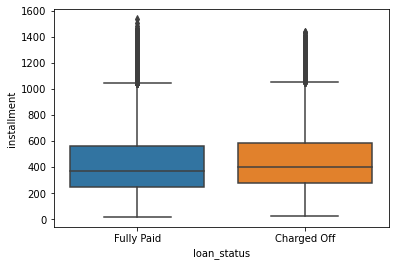

In [26]:
sns.boxplot(data=df_eda,y='installment',x='loan_status',orient='v')

#### we have checked max and min value of the installment, 
#### installment for both Fully Paid and Charged off looks silimar ie similar dristribution ,similar median values .
#### there is some outliers 

### grade

In [27]:
df_eda['grade'].value_counts()

B    92627
C    84797
A    51332
D    50880
E    25329
F     9402
G     2457
Name: grade, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

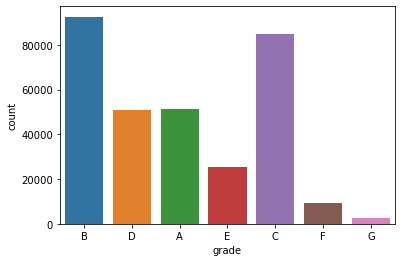

In [28]:
sns.countplot(df_eda['grade'])

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='grade', ylabel='count'>

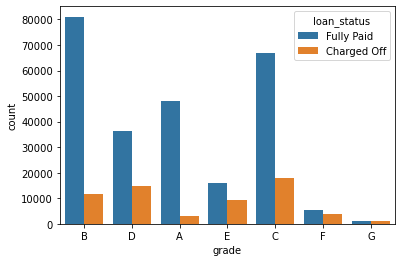

In [29]:
sns.countplot(df_eda['grade'],hue=df_eda['loan_status'])

####  high count of customers having grade = B 
####  low count of customers having grade = G
####  Impacted by class imbalace hence count for fully paid is high in very grade

### Sub grade

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


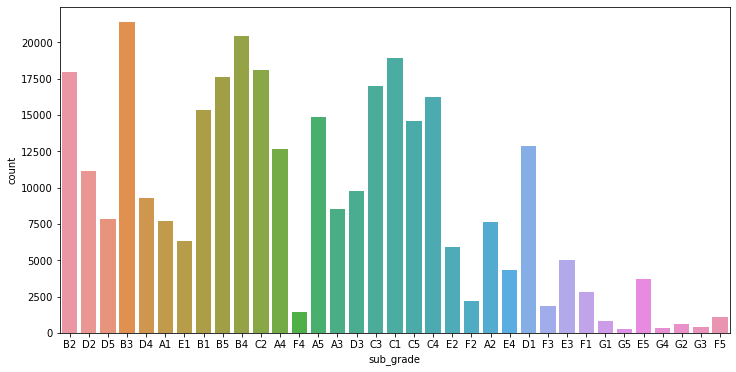

In [30]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['sub_grade'])
plt.show()

In [31]:
df_eda['sub_grade'].value_counts()

B3    21376
B4    20408
C1    18906
C2    18109
B2    17939
B5    17578
C3    16993
C4    16217
B1    15326
A5    14826
C5    14572
D1    12874
A4    12643
D2    11155
D3     9735
D4     9304
A3     8495
D5     7812
A1     7732
A2     7636
E1     6354
E2     5931
E3     5036
E4     4309
E5     3699
F1     2804
F2     2189
F3     1830
F4     1462
F5     1117
G1      845
G2      614
G3      439
G4      307
G5      252
Name: sub_grade, dtype: int64

####  high count of customers having grade = B3
####  low count of customers having grade = G5
#### this feature is in hierarchical relationship with grade feature

### employee title 

In [32]:
df_eda['emp_title'].nunique()

143252

In [33]:
df_eda['emp_title']

379004                      CNMI Government
24732        customer service / account rep
388453                       Branch Manager
178101    California Dept of transportation
51902        Air Traffic Control Specialist
                        ...                
69670                      Registered nurse
253336       Director, Business Development
49152                         aero mechanic
346367                         Truck Driver
7902                            SymphonyIRI
Name: emp_title, Length: 316824, dtype: object

#### this feature have high cardinality , since we are not using any nlp technique to encode this , we might drop this feature

### employment length years

In [34]:
df_eda['emp_length'].value_counts()

10+ years    101015
2 years       28691
< 1 year      25401
3 years       25170
5 years       21264
1 year        20751
4 years       19139
6 years       16728
7 years       16596
8 years       15313
9 years       12215
Name: emp_length, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


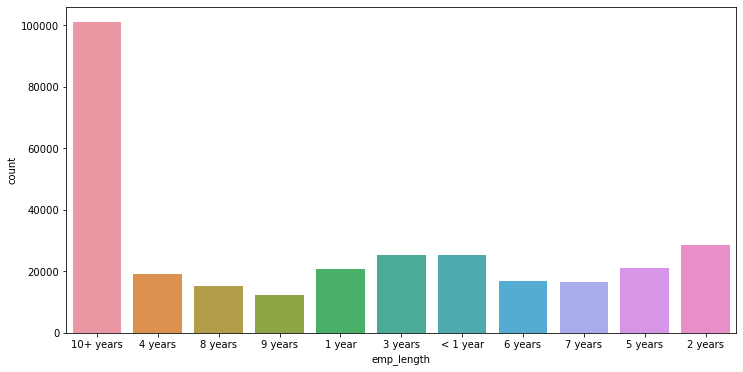

In [35]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['emp_length'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


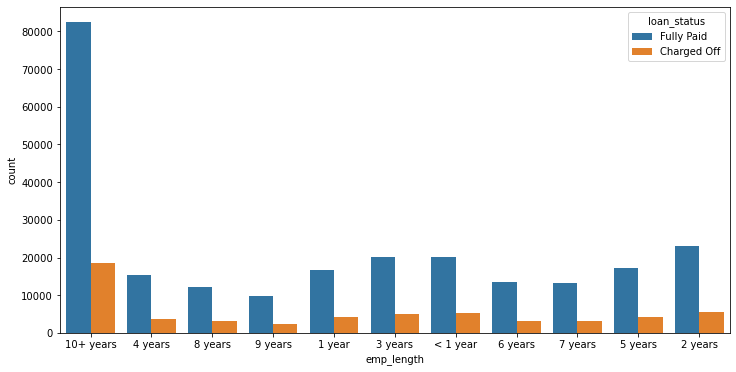

In [36]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['emp_length'],hue=df_eda['loan_status'])
plt.show()

#### customers having 10 plus years of experience are more 
#### imapacted by class imbalace , hence count of fully paid is greater than charged off for each of the catagoery 

### Home ownership

In [37]:
df_eda['home_ownership'].value_counts()

MORTGAGE    158794
RENT        127745
OWN          30172
OTHER           91
NONE            20
ANY              2
Name: home_ownership, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


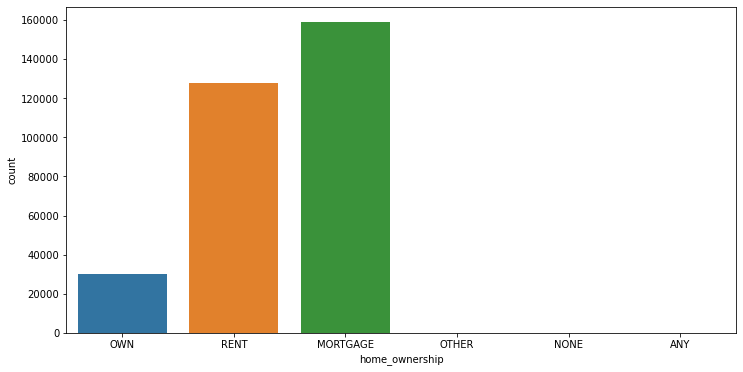

In [38]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['home_ownership'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='home_ownership', ylabel='count'>

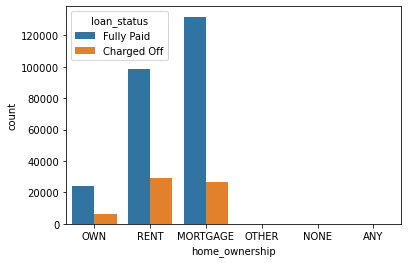

In [39]:
sns.countplot(df_eda['home_ownership'],hue=df_eda['loan_status'])

#### most of the customer have mortgage 
#### only few have own home

### Anual income 

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

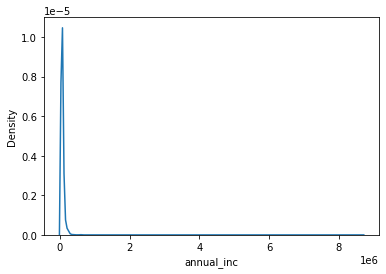

In [40]:
sns.kdeplot(df_eda['annual_inc'])

<AxesSubplot:xlabel='annual_inc', ylabel='Count'>

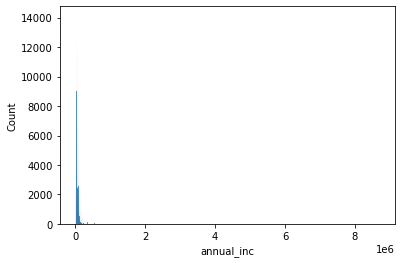

In [41]:
sns.histplot(df_eda['annual_inc'])

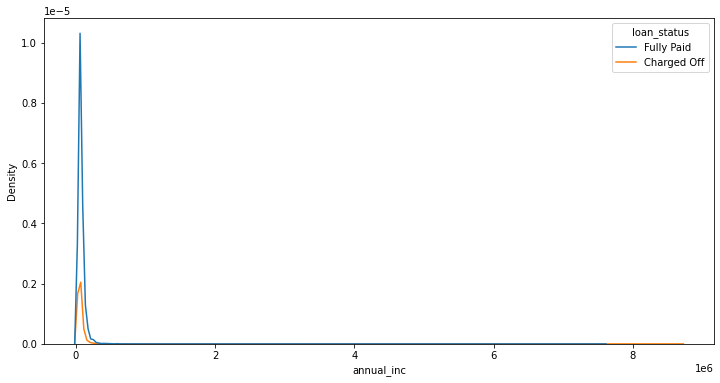

In [42]:
plt.figure(figsize=(12, 6)) 
sns.kdeplot(df_eda['annual_inc'],hue=df_eda['loan_status'])
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='annual_inc'>

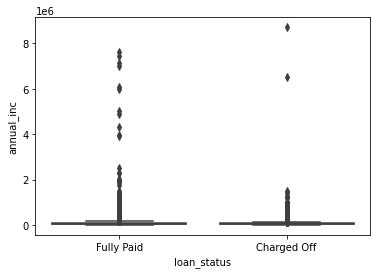

In [43]:
sns.boxplot(data=df_eda,y='annual_inc',x='loan_status',orient='v')

#### we have checked max and min value of the annual income , 
#### annual income for both Fully Paid and Charged off looks silimar ie similar dristribution ,similar median values .
#### there is some outliers 
#### most of the data is concentrated in left side of the histogram

### Verification status 

In [44]:
df_eda['verification_status'].value_counts()

Verified           111573
Source Verified    105346
Not Verified        99905
Name: verification_status, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


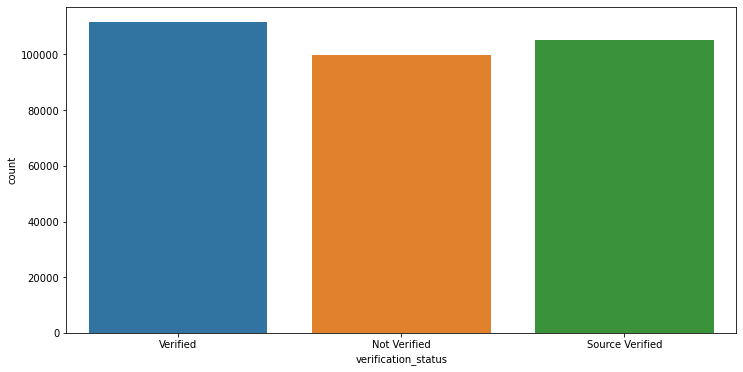

In [45]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['verification_status'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


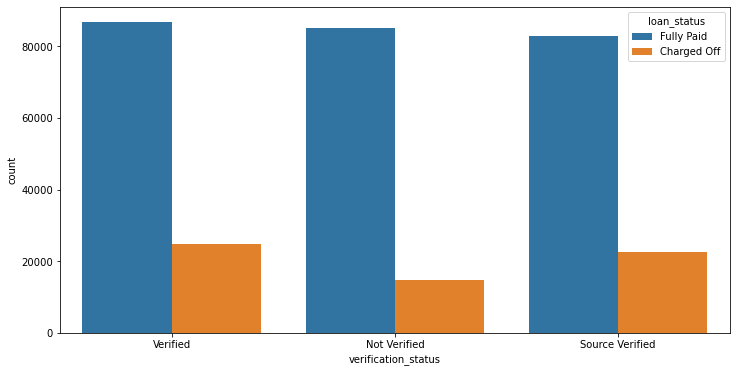

In [46]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['verification_status'],hue=df_eda['loan_status'])
plt.show()

#### most of the customers are verified 
#### loanTap needs to put more interest in verification of the not verified customers

### Issue date

In [47]:
df_eda['issue_d']=pd.to_datetime(df_eda['issue_d'], format='%b-%Y')

In [48]:
df_eda['issue_d'].dt.year.value_counts()

2014    82405
2013    78192
2015    75480
2012    32826
2016    22332
2011    13897
2010     7453
2009     3074
2008     1004
2007      161
Name: issue_d, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


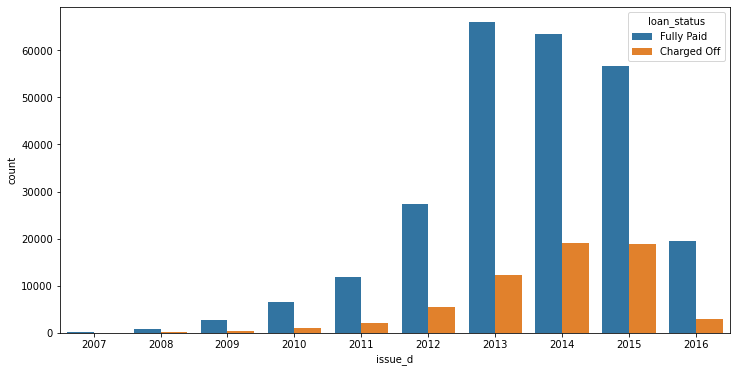

In [49]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['issue_d'].dt.year,hue=df_eda['loan_status'])
plt.show()

#### LoanTap issued most of the loan in 2014 
#### loan issued for fully paid customers decreased from 2013

### Loan status ( Target value)

In [50]:

df_eda['loan_status'].value_counts()

Fully Paid     254686
Charged Off     62138
Name: loan_status, dtype: int64

In [51]:
df_eda['loan_status'].value_counts()/df_eda.shape[0]

Fully Paid     0.803872
Charged Off    0.196128
Name: loan_status, dtype: float64

#### 80% of the customers  are fully paid customers 
#### 20 % of the customers are charged of customers 
#### Imbalnace class data set 80 :20

### purpose 

In [52]:
df_eda['purpose'].value_counts()

debt_consolidation    187571
credit_card            66417
home_improvement       19198
other                  16946
major_purchase          7081
small_business          4520
car                     3760
medical                 3340
moving                  2315
vacation                1960
house                   1779
wedding                 1454
renewable_energy         273
educational              210
Name: purpose, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


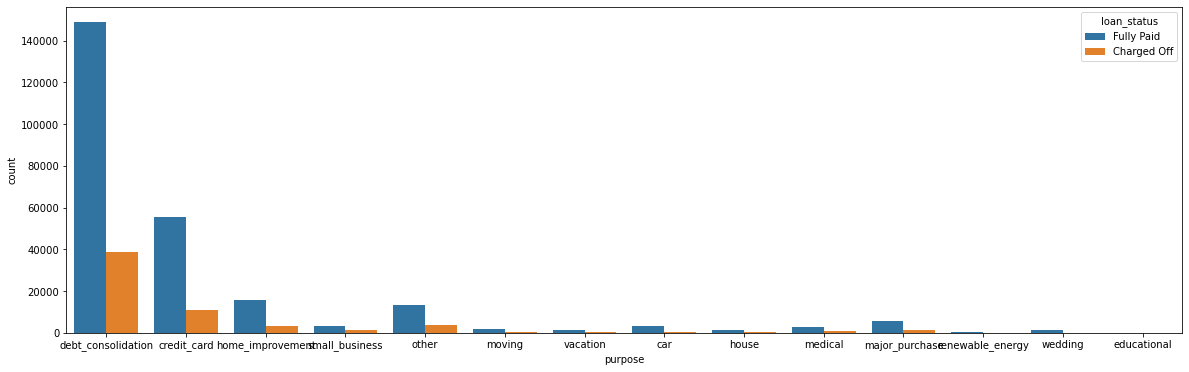

In [53]:
plt.figure(figsize=(20, 6)) 
sns.countplot(df_eda['purpose'],hue=df_eda['loan_status'],)
plt.show()

### Title

In [54]:
df_eda['title'].value_counts()

Debt consolidation                       121886
Credit card refinancing                   41341
Home improvement                          12165
Other                                     10372
Debt Consolidation                         9244
                                          ...  
Debt Consolidation - Credit Card              1
Responsible Borrower refinancing debt         1
Get Finances in Order                         1
final credit card pay off                     1
Credit card pay off and shred them            1
Name: title, Length: 40305, dtype: int64

#### most of the customers take loan for Debt consolidation
#### title feature have high cardinality so we ignore it 

### DTI 

In [55]:
df_eda['dti']

379004    26.34
24732      2.26
388453    34.38
178101    21.30
51902      5.08
          ...  
69670     21.14
253336    27.16
49152     14.77
346367    12.98
7902       7.17
Name: dti, Length: 316824, dtype: float64

<AxesSubplot:xlabel='dti', ylabel='Density'>

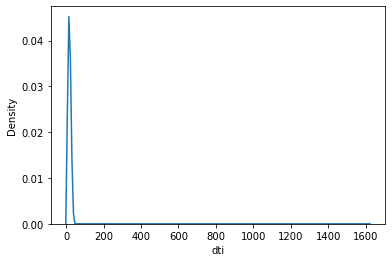

In [56]:
sns.kdeplot(df_eda['dti'])

<AxesSubplot:xlabel='dti', ylabel='Count'>

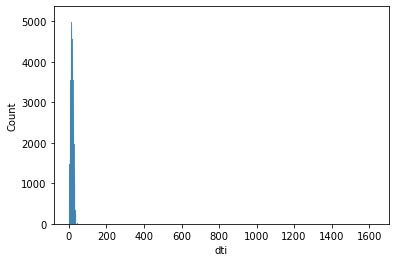

In [57]:
sns.histplot(df_eda['dti'])

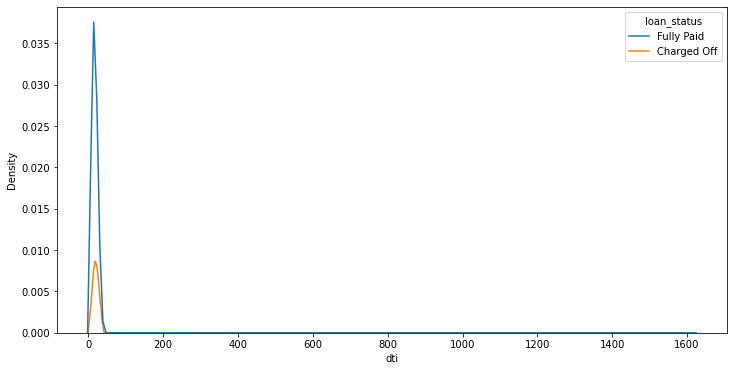

In [58]:
plt.figure(figsize=(12, 6)) 
sns.kdeplot(df_eda['dti'],hue=df_eda['loan_status'])
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='dti'>

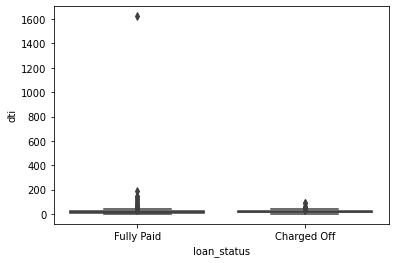

In [59]:
sns.boxplot(data=df_eda,y='dti',x='loan_status',orient='v')

#### we have checked max and min value of the DTI , 
#### DTI for both Fully Paid and Charged off looks silimar ie similar dristribution ,similar median values .
#### there is some outliers 
#### most of the data is concentrated in left side of the histogram

### earliest_cr_line

In [60]:
df_eda['earliest_cr_line']=pd.to_datetime(df_eda['earliest_cr_line'], format='%b-%Y')

In [61]:
df_eda['earliest_cr_line'].dt.year.value_counts()[:10]

2000    23583
2001    23299
1999    21120
2002    20764
2003    18953
1998    18089
2004    16730
1997    15060
1996    14776
2005    13970
Name: earliest_cr_line, dtype: int64

#### most of the customers have opened thier first credit in year 2000 

### Open account

In [62]:
df_eda['open_acc']

379004     8.0
24732      6.0
388453    12.0
178101    18.0
51902      5.0
          ... 
69670     16.0
253336    14.0
49152      9.0
346367    11.0
7902       7.0
Name: open_acc, Length: 316824, dtype: float64

<AxesSubplot:xlabel='open_acc', ylabel='Count'>

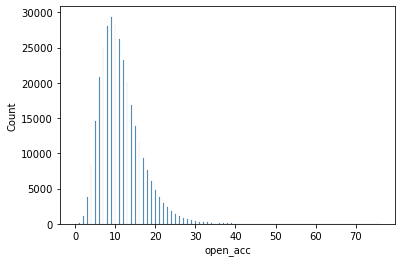

In [63]:
sns.histplot(df_eda['open_acc'])

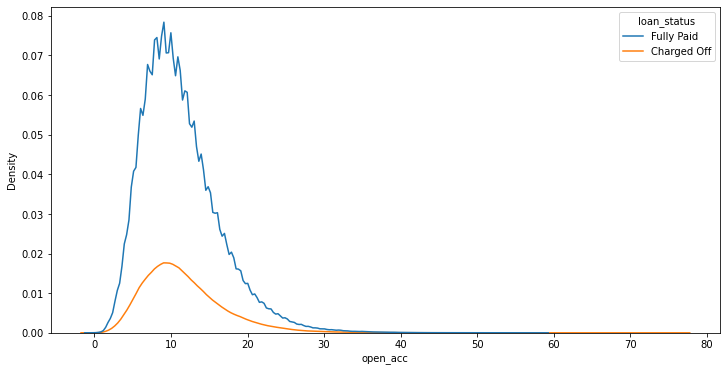

In [64]:
plt.figure(figsize=(12, 6)) 
sns.kdeplot(df_eda['open_acc'],hue=df_eda['loan_status'])
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='open_acc'>

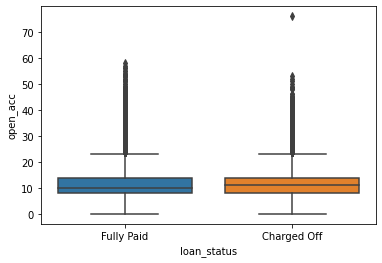

In [65]:
sns.boxplot(data=df_eda,y='open_acc',x='loan_status',orient='v')

#### customers have average 10 open credit  accounts 
#### no much diff in median or dist of data 

### pub rec Number of derogatory public records

In [66]:
df_eda['pub_rec'].value_counts()

0.0     270577
1.0      39786
2.0       4408
3.0       1220
4.0        422
5.0        188
6.0        106
7.0         47
8.0         28
10.0        11
9.0         10
11.0         7
12.0         4
13.0         4
19.0         2
15.0         1
24.0         1
86.0         1
17.0         1
Name: pub_rec, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


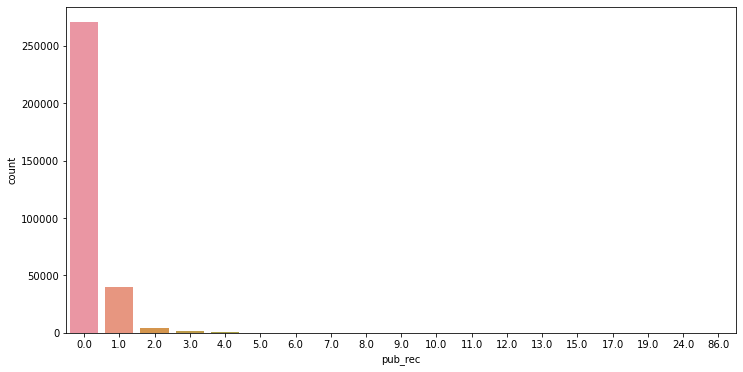

In [67]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['pub_rec'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


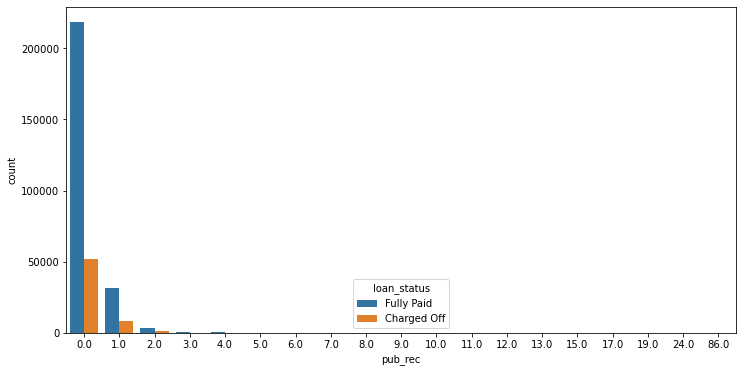

In [68]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['pub_rec'],hue=df_eda['loan_status'])
plt.show()

#### most of the customers have  zero Number of derogatory public records
#### impacted by class imbalace 

In [69]:
### Revol balance Total credit revolving balance

In [70]:
df_eda['revol_bal'].value_counts()

0.0         1748
5655.0        33
5514.0        33
7792.0        32
6683.0        31
            ... 
92106.0        1
131916.0       1
37096.0        1
68598.0        1
52816.0        1
Name: revol_bal, Length: 52109, dtype: int64

<AxesSubplot:xlabel='revol_bal', ylabel='Count'>

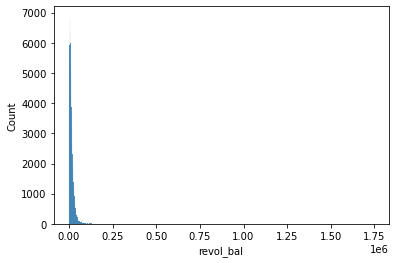

In [71]:
sns.histplot(df_eda['revol_bal'])

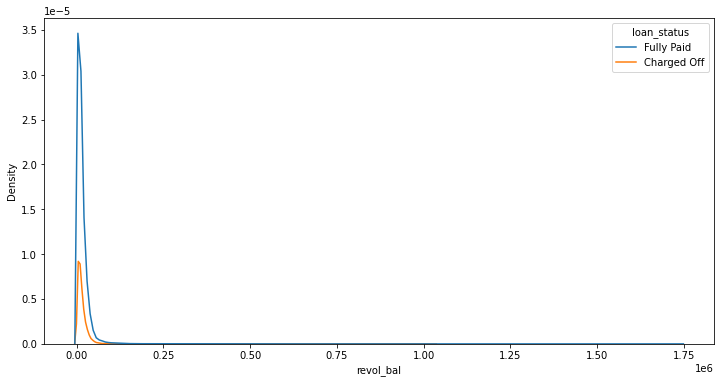

In [72]:
plt.figure(figsize=(12, 6)) 
sns.kdeplot(df_eda['revol_bal'],hue=df_eda['loan_status'])
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='revol_bal'>

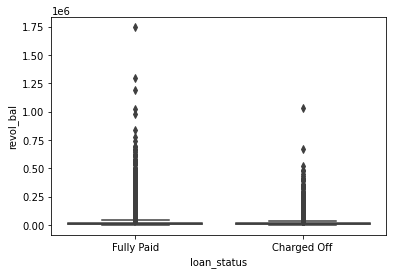

In [73]:
sns.boxplot(data=df_eda,y='revol_bal',x='loan_status',orient='v')

#### on an average customers have 0 -0.25*10^6 Total credit revolving balance
#### same median ,same dist btw to target class

In [74]:
#### Revol util

In [75]:
df_eda['revol_util'].value_counts()

0.00      1829
53.00      606
62.00      605
55.00      600
54.00      593
          ... 
109.30       1
116.10       1
108.30       1
28.41        1
17.67        1
Name: revol_util, Length: 1192, dtype: int64

<AxesSubplot:xlabel='revol_util', ylabel='Count'>

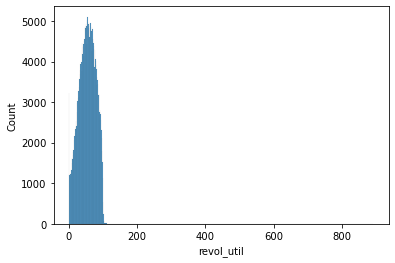

In [76]:
sns.histplot(df_eda['revol_util'])

<AxesSubplot:xlabel='loan_status', ylabel='revol_util'>

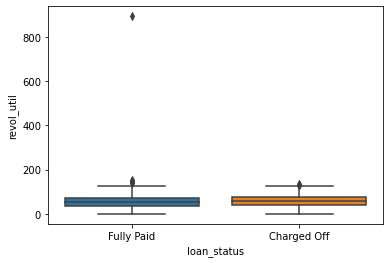

In [77]:
sns.boxplot(data=df_eda,y='revol_util',x='loan_status',orient='v')

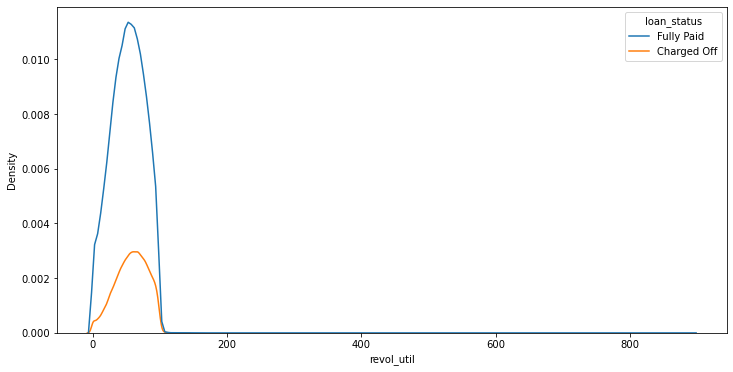

In [78]:
plt.figure(figsize=(12, 6)) 
sns.kdeplot(df_eda['revol_util'],hue=df_eda['loan_status'])
plt.show()

#### Same behevior as revol bal but with less range [0-800]
#### hard to diff the target class with this feature

### Total account

In [79]:
df_eda['total_acc']

379004    27.0
24732      8.0
388453    36.0
178101    31.0
51902      8.0
          ... 
69670     42.0
253336    50.0
49152     32.0
346367    15.0
7902      21.0
Name: total_acc, Length: 316824, dtype: float64

<AxesSubplot:xlabel='total_acc', ylabel='Count'>

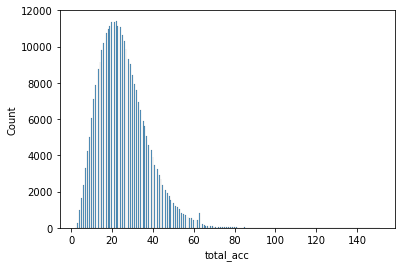

In [80]:
sns.histplot(df_eda['total_acc'])

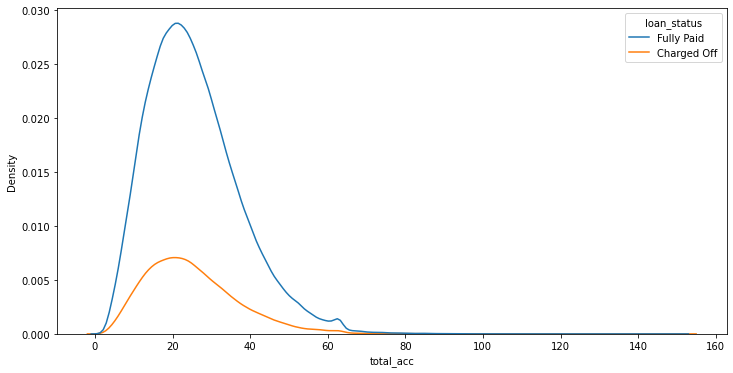

In [81]:
plt.figure(figsize=(12, 6)) 
sns.kdeplot(df_eda['total_acc'],hue=df_eda['loan_status'])
plt.show()

<AxesSubplot:xlabel='loan_status', ylabel='total_acc'>

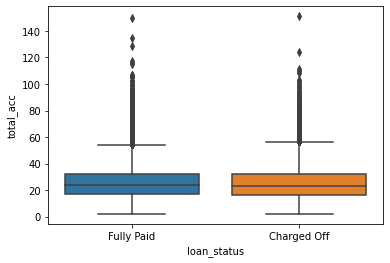

In [82]:
sns.boxplot(data=df_eda,y='total_acc',x='loan_status',orient='v')

#### hard to diff the target class with this feature
#### skewed dist
#### outliers 

### initial_list_status

In [83]:
df_eda['initial_list_status'].value_counts()

f    190613
w    126211
Name: initial_list_status, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


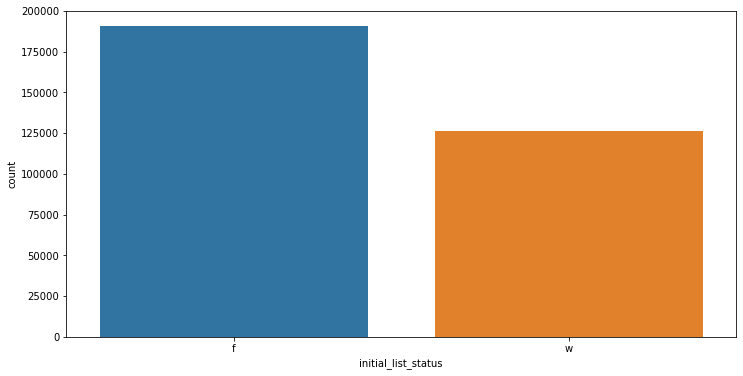

In [84]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['initial_list_status'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


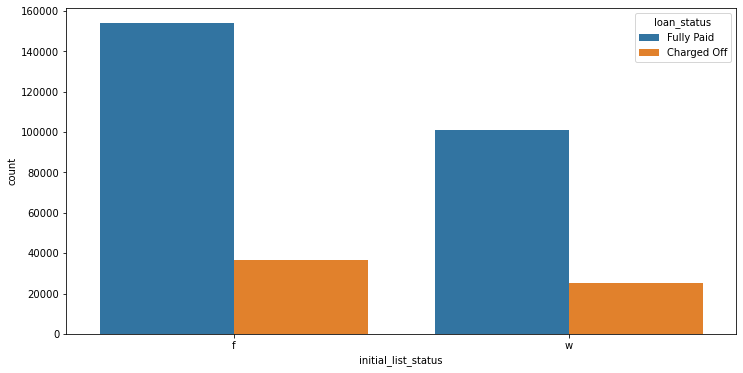

In [85]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['initial_list_status'],hue=df_eda['loan_status'])
plt.show()

### Application Type

In [86]:
df_eda['application_type'].value_counts()

INDIVIDUAL    316267
JOINT            343
DIRECT_PAY       214
Name: application_type, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


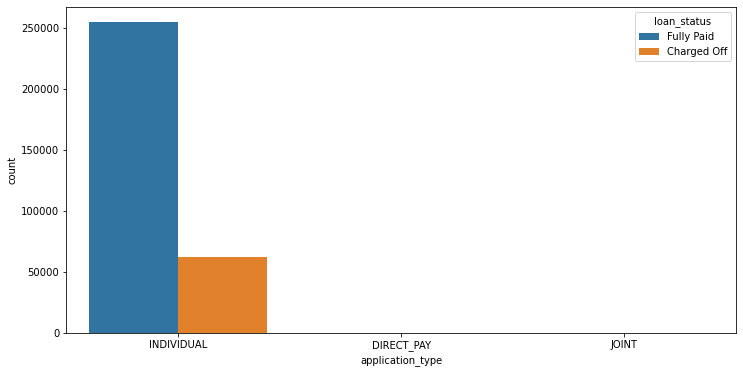

In [87]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['application_type'],hue=df_eda['loan_status'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


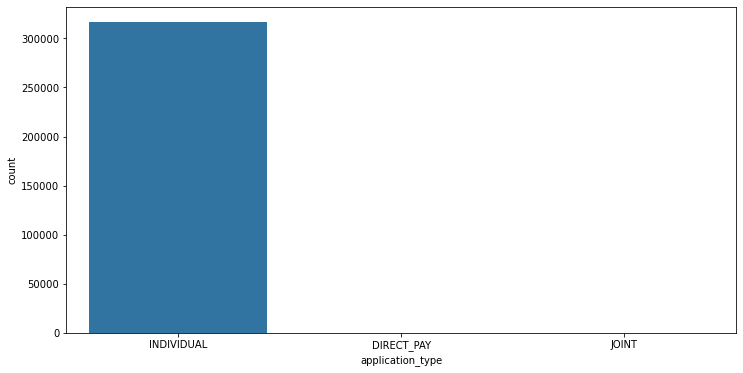

In [88]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['application_type'])
plt.show()

#### count of initial_list_status=f is more
#### impacted by class imbalance 
####  count of application type =INIVIDUAL is more

### Mort account mortgage accounts

In [89]:
df_eda['mort_acc'].value_counts()

0.0     111846
1.0      48331
2.0      39909
3.0      30541
4.0      22311
5.0      14525
6.0       8846
7.0       4858
8.0       2500
9.0       1317
10.0       679
11.0       380
12.0       214
13.0       116
14.0        86
15.0        45
16.0        28
17.0        16
18.0        13
20.0        12
19.0        12
24.0        10
25.0         4
22.0         3
21.0         3
31.0         2
27.0         2
32.0         2
26.0         2
30.0         1
34.0         1
28.0         1
23.0         1
Name: mort_acc, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


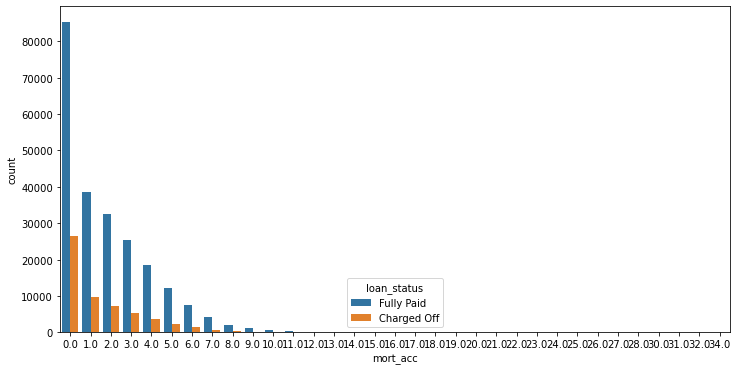

In [90]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['mort_acc'],hue=df_eda['loan_status'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


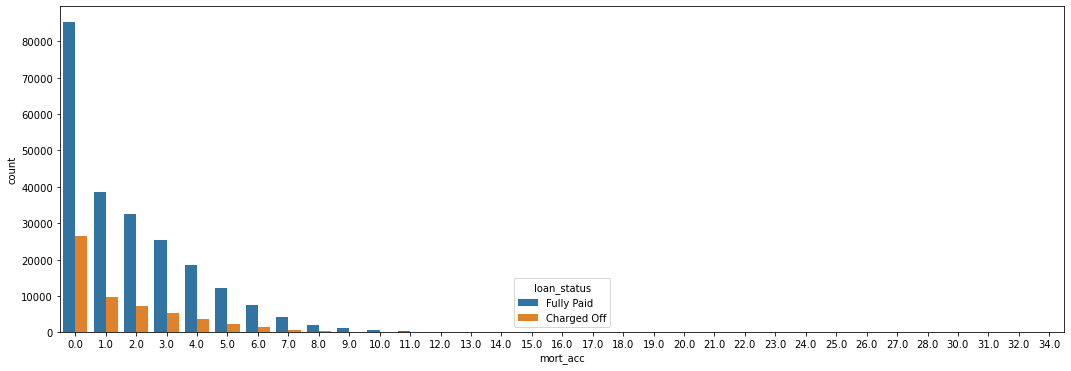

In [91]:
plt.figure(figsize=(18, 6)) 
sns.countplot(df_eda['mort_acc'],hue=df_eda['loan_status'])
plt.show()

### pub_rec_bankruptcies

In [92]:
df_eda['pub_rec_bankruptcies'].value_counts()

0.0    280263
1.0     34254
2.0      1483
3.0       279
4.0        67
5.0        29
6.0         7
7.0         3
8.0         2
Name: pub_rec_bankruptcies, dtype: int64

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


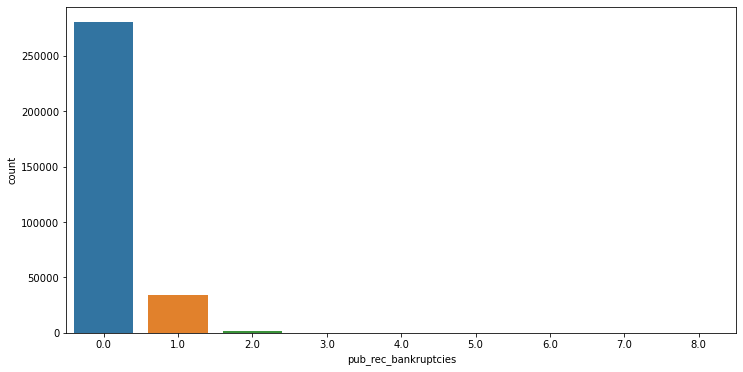

In [93]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['pub_rec_bankruptcies'])
plt.show()

C:\Users\Abhilash\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


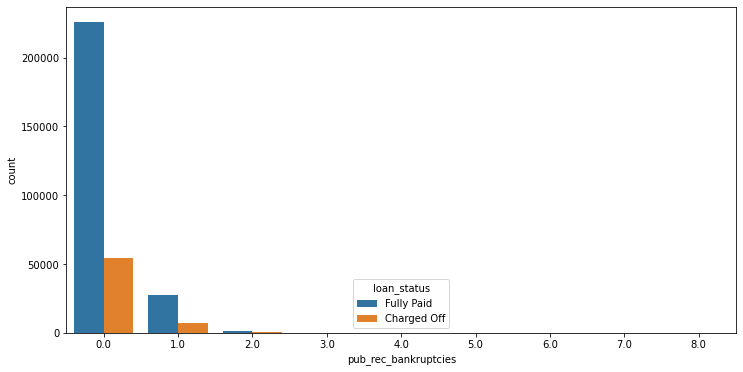

In [94]:
plt.figure(figsize=(12, 6)) 
sns.countplot(df_eda['pub_rec_bankruptcies'],hue=df_eda['loan_status'])
plt.show()

#### most of the customers have 0 mortgage accounts and Number of public record bankruptcie

### Address 

In [95]:
df_eda['address']

379004     7530 Barnes Flat Apt. 584\r\nWhitetown, NV 30723
24732     443 Rice Views Apt. 282\r\nNorth Jameshaven, A...
388453    3857 Christopher Courts Suite 005\r\nEast Chri...
178101     840 Parks Viaduct\r\nLake Brittanyside, MT 48052
51902           042 Jamie Grove\r\nEast Maryshire, LA 70466
                                ...                        
69670     87725 Benjamin Parkways Suite 228\r\nNew Judit...
253336            56526 Johnson Way\r\nStevenside, AR 48052
49152     00218 Roach Throughway\r\nLake Christineberg, ...
346367              9706 Kelly Coves\r\nKevinbury, VA 22690
7902                271 Walton Lodge\r\nWaynefort, LA 05113
Name: address, Length: 316824, dtype: object

#### High cardinality ignore the feature

### Gist of  and uni - bi varient analysis

####  most of the feature cannot differentiate the target class
#### it is impacted by class imbalance hence we cannot exactly comment on them
#### some of the numeric data are skewed 
#### most of the catagorical feature have some ordinal values for its catagoery 
#### every countinous variable have outliers in it 
#### null values are present in some of the features 


In [96]:
df_eda.corr()

<ipython-input-96-943261c2f034>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_eda.corr()


,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
loan_amnt,1.000000,0.168376,0.953961,0.327633,0.038950,0.198082,-0.077417,0.327179,0.101597,0.223256,0.222280,-0.106056
int_rate,0.168376,1.000000,0.162373,-0.054604,0.165240,0.010813,0.059096,-0.011586,0.294302,-0.036583,-0.082620,0.057244
installment,0.953961,0.162373,1.000000,0.321306,0.037414,0.188619,-0.067440,0.315310,0.125298,0.201916,0.193549,-0.097976
annual_inc,0.327633,-0.054604,0.321306,1.000000,-0.163472,0.131772,-0.012708,0.292952,0.026952,0.186795,0.229272,-0.048767
dti,0.038950,0.165240,0.037414,-0.163472,1.000000,0.287201,-0.034732,0.132612,0.184801,0.214702,-0.053373,-0.028164
open_acc,0.198082,0.010813,0.188619,0.131772,0.287201,1.000000,-0.017832,0.220565,-0.130417,0.679785,0.107696,-0.027193
pub_rec,-0.077417,0.059096,-0.067440,-0.012708,-0.034732,-0.017832,1.000000,-0.100048,-0.075667,0.019819,0.011451,0.695748
revol_bal,0.327179,-0.011586,0.315310,0.292952,0.132612,0.220565,-0.100048,1.000000,0.225543,0.190798,0.194747,-0.123655
revol_util,0.101597,0.294302,0.125298,0.026952,0.184801,-0.130417,-0.075667,0.225543,1.000000,-0.102843,0.008990,-0.086946
total_acc,0.223256,-0.036583,0.201916,0.186795,0.214702,0.679785,0.019819,0.190798,-0.102843,1.000000,0.379910,0.042309


<ipython-input-97-86865c8a794d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_eda.corr(),annot=True)


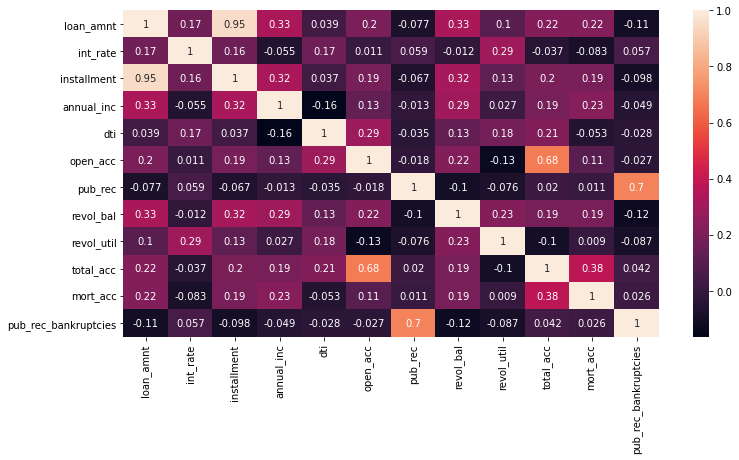

In [97]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(df_eda.corr(),annot=True)
plt.show()

### Corelation matrix between each cloumns countionus variable 
#### loan amount is corelated with installment with 0.95
#### pub_rec is corelated with pub_rec_bankruptcies 

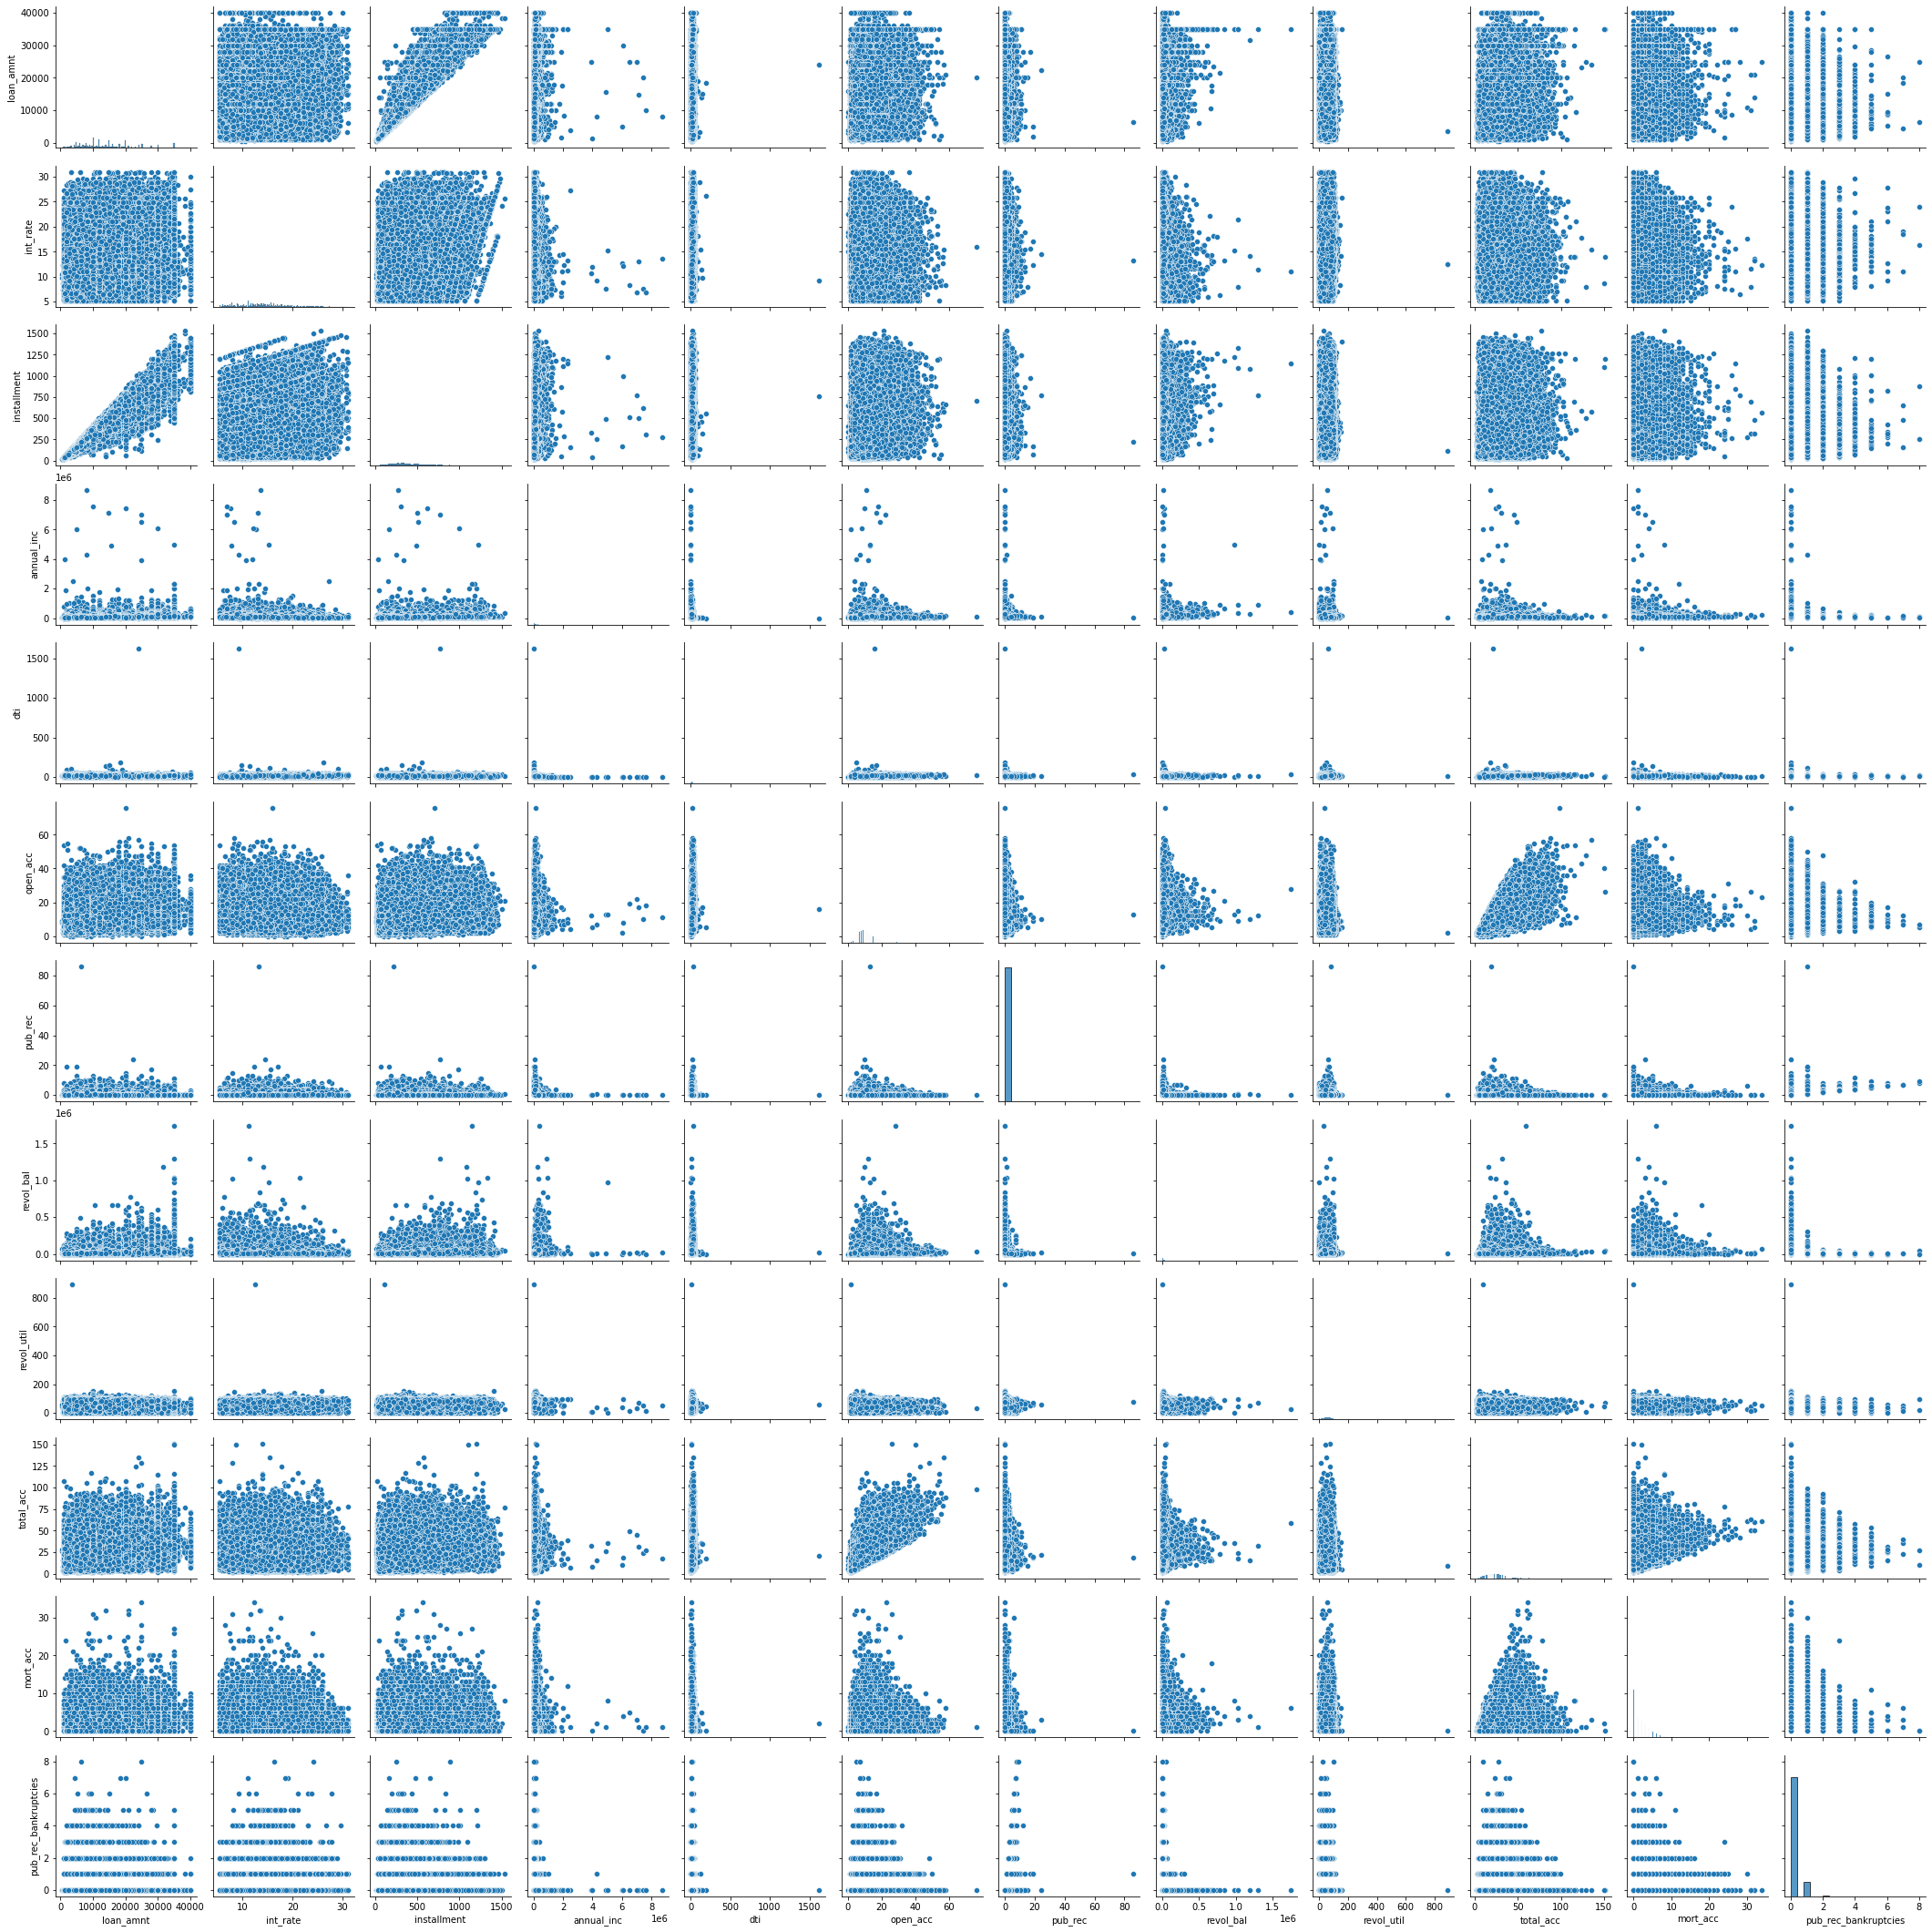

In [98]:
sns.pairplot(df_eda)

#### similar pattern can be seen here 

### Chi - square test for variable dependence and independence 

In [99]:
df_cat_test=df_eda.copy()

In [100]:
df_cat_test.dropna(inplace=True)

In [101]:
li_cat=[]
li_count=[]
for i in df_cat_test.columns:
    if(df_cat_test[i].dtype=='float64'):
        li_count.append(i)
    else:
        li_cat.append(i)

In [102]:
li_cat.remove('address')
li_cat.remove('loan_status')
li_cat.remove('issue_d')
li_cat.remove('earliest_cr_line')
li_cat.remove('emp_title')
li_cat.remove('title')

In [103]:
df_cat_test[li_cat]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
24732,36 months,D,D2,4 years,RENT,Verified,debt_consolidation,f,INDIVIDUAL
388453,60 months,D,D5,10+ years,MORTGAGE,Verified,credit_card,w,INDIVIDUAL
178101,36 months,B,B3,10+ years,RENT,Verified,debt_consolidation,f,INDIVIDUAL
51902,60 months,D,D4,10+ years,RENT,Verified,debt_consolidation,w,INDIVIDUAL
198937,36 months,A,A1,8 years,OWN,Not Verified,home_improvement,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...
69670,36 months,C,C3,8 years,MORTGAGE,Verified,debt_consolidation,w,INDIVIDUAL
253336,36 months,B,B1,2 years,MORTGAGE,Verified,debt_consolidation,f,INDIVIDUAL
49152,36 months,B,B3,4 years,RENT,Source Verified,other,f,INDIVIDUAL
346367,36 months,B,B5,5 years,RENT,Verified,debt_consolidation,f,INDIVIDUAL


In [104]:
df_cat_test[li_cat]

,term,grade,sub_grade,emp_length,home_ownership,verification_status,purpose,initial_list_status,application_type
24732,36 months,D,D2,4 years,RENT,Verified,debt_consolidation,f,INDIVIDUAL
388453,60 months,D,D5,10+ years,MORTGAGE,Verified,credit_card,w,INDIVIDUAL
178101,36 months,B,B3,10+ years,RENT,Verified,debt_consolidation,f,INDIVIDUAL
51902,60 months,D,D4,10+ years,RENT,Verified,debt_consolidation,w,INDIVIDUAL
198937,36 months,A,A1,8 years,OWN,Not Verified,home_improvement,w,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...
69670,36 months,C,C3,8 years,MORTGAGE,Verified,debt_consolidation,w,INDIVIDUAL
253336,36 months,B,B1,2 years,MORTGAGE,Verified,debt_consolidation,f,INDIVIDUAL
49152,36 months,B,B3,4 years,RENT,Source Verified,other,f,INDIVIDUAL
346367,36 months,B,B5,5 years,RENT,Verified,debt_consolidation,f,INDIVIDUAL


#### (H0) is a statement that assumes there is no significant difference or relationship between variables or groups in the population
#### (Ha) is a statement that contradicts the null hypothesis and suggests that there is a significant difference or relationship

In [105]:
from scipy.stats import chi2_contingency

chi2_scores = []
p_values = []

for feature in li_cat:
    contingency_table = pd.crosstab(df_cat_test[feature], df_cat_test['loan_status'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    chi2_scores.append(chi2)
    p_values.append(p_value)

In [106]:
p_values

[0.0,
 0.0,
 0.0,
 4.593897896376249e-25,
 1.6332410535729836e-304,
 0.0,
 1.381371747885758e-187,
 0.8428180752696409,
 1.1628397698665315e-08]

In [107]:
li_cat

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type']

#### By doing this test we conclude that all of these catagorical feature and target feature are dependent 

In [108]:
df_eda_v1=df_eda.copy()

In [109]:
df_eda_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 316824 entries, 379004 to 7902
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             316824 non-null  float64       
 1   term                  316824 non-null  object        
 2   int_rate              316824 non-null  float64       
 3   installment           316824 non-null  float64       
 4   grade                 316824 non-null  object        
 5   sub_grade             316824 non-null  object        
 6   emp_title             298538 non-null  object        
 7   emp_length            302283 non-null  object        
 8   home_ownership        316824 non-null  object        
 9   annual_inc            316824 non-null  float64       
 10  verification_status   316824 non-null  object        
 11  issue_d               316824 non-null  datetime64[ns]
 12  purpose               316824 non-null  object        
 

In [110]:
y1=df_eda_v1['loan_status']
X1=df_eda_v1.drop(columns=['loan_status'])
X_train_v1, X_valid, y_train_v1, y_valid = train_test_split(X1, y1, test_size=0.2, stratify=y1, random_state=42)

#### stratified split of train data into train and validation set

In [111]:
X_train_v1['loan_status']=y_train_v1

In [112]:
X_train_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253459 entries, 234340 to 221626
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   loan_amnt             253459 non-null  float64       
 1   term                  253459 non-null  object        
 2   int_rate              253459 non-null  float64       
 3   installment           253459 non-null  float64       
 4   grade                 253459 non-null  object        
 5   sub_grade             253459 non-null  object        
 6   emp_title             238785 non-null  object        
 7   emp_length            241762 non-null  object        
 8   home_ownership        253459 non-null  object        
 9   annual_inc            253459 non-null  float64       
 10  verification_status   253459 non-null  object        
 11  issue_d               253459 non-null  datetime64[ns]
 12  purpose               253459 non-null  object        

In [113]:
df_train_pre=X_train_v1.copy()

### Pre-processing the data  and handling null and outliers

In [114]:
# Extracting numeric value from the term column
def term_col(col1):
    return int(col1.split()[0])

In [115]:
# df_train_pre['term']=df_train_pre['term'].apply(term_col)

In [116]:
# Encoding grade column , since it is a ordinal value we give numeric encoding 
def grade_col(col2):
    if(col2=='A'):
        return 1
    elif(col2=='B'):
        return 2
    elif(col2=='C'):
        return 3
    elif(col2=='D'):
        return 4
    elif(col2=='E'):
        return 5
    elif(col2=='F'):
        return 6
    elif(col2=='G'):
        return 7
    else:
        return 0

In [117]:
# df_train_pre['grade']=df_train_pre['grade'].apply(grade_col)

In [118]:
#  since it is a ordinal value we give numeric encoding 
def emp_length_pre(col3):
    if(col3=="3 years"):
        return 3
    elif(col3=="4 years"):
        return 4
    elif(col3=="5 years"):
        return 5
    elif(col3=="6 years"):
        return 6
    elif(col3=="7 years"):
        return 7
    elif(col3=="8 years"):
        return 8
    elif(col3=="9 years"):
        return 9
    elif(col3=="1 year"):
        return 1
    elif(col3=="2 years"):
        return 2
    elif(col3=="10+ years"):
        return 12
    else:
        return 0
def verification_status_col(col5):
    if(col5=='Verified'):
        return 2
    elif(col5=='Source Verified'):
        return 3
    elif(col5=='Not Verified'):
        return 1
    else:
        return 0
def home_own_col(col4):
    if(col4=='MORTGAGE'):
        return 1
    elif(col4=='RENT'):
        return 2
    elif(col4=='OWN'):
        return 3
    else:
        return 0

    

In [119]:
def initial_list_status_col(col5):
    if(col5=='w'):
        return 1
    else:
        return 0
def application_type_col(col6):
    if(col6=='INDIVIDUAL'):
        return 1
    elif(col6=='JOINT'):
        return 2
    elif(col6=='DIRECT_PAY'):
        return 3
    else:
        return 0
def loan_status_col(col7):
    if(col7=='Fully Paid'):
        return 1
    else:
        return 0
    


In [120]:
df_train_pre.loc[0]
    

loan_amnt                                                      10000.0
term                                                         36 months
int_rate                                                         11.44
installment                                                     329.48
grade                                                                B
sub_grade                                                           B4
emp_title                                                    Marketing
emp_length                                                   10+ years
home_ownership                                                    RENT
annual_inc                                                    117000.0
verification_status                                       Not Verified
issue_d                                            2015-01-01 00:00:00
purpose                                                       vacation
title                                                         Vacation
dti   

In [121]:
def pre_processing_data(df_pre):
    df_pre=df_pre.drop(columns=['address','title','emp_title','issue_d','sub_grade','purpose'])
    df_pre['term']=df_pre['term'].apply(term_col)
    df_pre['grade']=df_pre['grade'].apply(grade_col)
    df_pre['emp_length']=df_pre['emp_length'].apply(emp_length_pre)
    df_pre['home_ownership']=df_pre['home_ownership'].apply(home_own_col)
    df_pre['verification_status']=df_pre['verification_status'].apply(verification_status_col)
    df_pre['earliest_cr_line']=pd.to_datetime(df_pre['earliest_cr_line'], format='%b-%Y')
    df_pre['earliest_cr_line']=2020-df_pre['earliest_cr_line'].dt.year
    df_pre['initial_list_status']=df_pre['initial_list_status'].apply(initial_list_status_col)
    df_pre['pub_rec']=df_pre['pub_rec'].apply(lambda x : 0 if x==0 else 1)
    df_pre['application_type']=df_pre['application_type'].apply(application_type_col)
    df_pre['mort_acc']=df_pre['mort_acc'].apply(lambda x : 0 if x==0 else 1)
    df_pre['pub_rec_bankruptcies']=df_pre['pub_rec_bankruptcies'].apply(lambda x : 0 if x==0 else 1)
    df_pre['loan_status']=df_pre['loan_status'].apply(loan_status_col)
    df_pre.dropna(inplace=True)
    return df_pre

#### this function gives us the pre-processed data set , and converts all catagorical into numeric 
#### we have dropped  'address','title','emp_title','issue_d','sub_grade','purpose'  because of high cardinality 

In [122]:
df_train_pre_v1=pre_processing_data(df_train_pre.copy())

In [123]:
y_real_train=df_train_pre_v1['loan_status']
x_real_train=df_train_pre_v1.drop(columns=['loan_status'])

In [124]:
x_real_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 253291 entries, 234340 to 221626
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             253291 non-null  float64
 1   term                  253291 non-null  int64  
 2   int_rate              253291 non-null  float64
 3   installment           253291 non-null  float64
 4   grade                 253291 non-null  int64  
 5   emp_length            253291 non-null  int64  
 6   home_ownership        253291 non-null  int64  
 7   annual_inc            253291 non-null  float64
 8   verification_status   253291 non-null  int64  
 9   dti                   253291 non-null  float64
 10  earliest_cr_line      253291 non-null  int64  
 11  open_acc              253291 non-null  float64
 12  pub_rec               253291 non-null  int64  
 13  revol_bal             253291 non-null  float64
 14  revol_util            253291 non-null  float64


### checking for co-linearity in the independent columns

In [125]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [126]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_real_train)
X_train_scaled=scaler.transform(x_real_train)
x_real_train=pd.DataFrame(X_train_scaled,columns=x_real_train.columns)

#### scaling the data using standard sclar 

In [127]:

X =x_real_train

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature        VIF
0              loan_amnt  58.665820
1                   term   6.635020
2               int_rate  12.091103
3            installment  51.097620
4                  grade  11.360332
5             emp_length   1.065094
6         home_ownership   1.321865
7             annual_inc   1.264951
8    verification_status   1.076120
9                    dti   1.261455
10      earliest_cr_line   1.199894
11              open_acc   2.083350
12               pub_rec   3.940701
13             revol_bal   1.338625
14            revol_util   1.291596
15             total_acc   2.166254
16   initial_list_status   1.058249
17      application_type   1.011629
18              mort_acc   1.485956
19  pub_rec_bankruptcies   3.916213


In [128]:
x_real_train.drop(columns=['grade','installment'],inplace=True)

#### we drop this columns 'grade','installment ,based on vif factor

In [129]:

X =x_real_train

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
print(vif_data)

                 feature       VIF
0              loan_amnt  1.503507
1                   term  1.494322
2               int_rate  1.503281
3             emp_length  1.064312
4         home_ownership  1.319462
5             annual_inc  1.264494
6    verification_status  1.073731
7                    dti  1.260595
8       earliest_cr_line  1.197261
9               open_acc  2.082570
10               pub_rec  3.937712
11             revol_bal  1.337750
12            revol_util  1.288218
13             total_acc  2.166096
14   initial_list_status  1.049729
15      application_type  1.011624
16              mort_acc  1.479105
17  pub_rec_bankruptcies  3.915541


#### RFECV stands for Recursive Feature Elimination with Cross-Validation. It is a feature selection technique commonly used in machine learning and data analysis tasks.

#### The main goal of RFECV is to select the most relevant features from a given dataset. It uses a recursive approach by iteratively removing features and evaluating their impact on the performance of a machine learning model

In [130]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [131]:
model = LogisticRegression()

In [132]:
model = LogisticRegression(class_weight='balanced')
from sklearn.feature_selection import RFECV
# Perform RFECV
rfecv = RFECV(estimator=model, scoring='f1')
X_rfecv = rfecv.fit_transform(x_real_train, y_real_train)

# Print the selected features
print("Optimal number of features: ", rfecv.n_features_)
print("Selected features: ", rfecv.support_)
print("Feature rankings: ", rfecv.ranking_)

Optimal number of features:  9
Selected features:  [False  True  True  True False  True  True  True False  True False False
 False  True False False  True False]
Feature rankings:  [ 5  1  1  1  2  1  1  1 10  1  6  4  3  1  9  8  1  7]


In [133]:
selected_features = pd.DataFrame({'Feature': x_real_train.columns, 'Selected': rfecv.support_})
print(selected_features)

                 Feature  Selected
0              loan_amnt     False
1                   term      True
2               int_rate      True
3             emp_length      True
4         home_ownership     False
5             annual_inc      True
6    verification_status      True
7                    dti      True
8       earliest_cr_line     False
9               open_acc      True
10               pub_rec     False
11             revol_bal     False
12            revol_util     False
13             total_acc      True
14   initial_list_status     False
15      application_type     False
16              mort_acc      True
17  pub_rec_bankruptcies     False


In [134]:

a1=selected_features[selected_features['Selected']==True]['Feature'].to_list()

#### selected columns 

In [135]:
#x_real_train.drop(columns=['earliest_cr_line','initial_list_status'],inplace=True)

In [136]:
x_real_train

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies
0,-0.981542,-0.558163,-1.568310,-0.725685,0.616813,0.011033,1.219021,-1.693703,-1.270863,-0.841019,-0.414465,-0.762243,-1.746523,-1.383179,-0.812906,-0.039488,-1.353981,-0.361926
1,-0.850182,-0.558163,1.083582,1.255554,-0.902669,1.111212,-1.264357,0.307059,0.397271,0.327485,-0.414465,0.785804,0.547312,0.637898,-0.812906,-0.039488,0.738563,-0.361926
2,-0.671054,-0.558163,0.627823,-1.386097,2.136294,-0.759092,-1.264357,-0.173992,-1.131852,-1.230520,-0.414465,-0.320049,1.790317,-1.130545,-0.812906,-0.039488,0.738563,-0.361926
3,-0.226221,1.791591,2.312344,-1.386097,0.616813,-0.601923,1.219021,0.351622,-1.409875,0.911737,-0.414465,-0.154795,-1.100488,-0.120006,1.230155,-0.039488,-1.353981,-0.361926
4,-1.115888,-0.558163,0.773040,-1.386097,-0.902669,0.246786,-1.264357,-0.258548,1.092327,0.132734,-0.414465,0.394536,0.547312,0.216840,-0.812906,-0.039488,0.738563,-0.361926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253286,-0.682996,-0.558163,-0.877969,-1.386097,-0.902669,-0.539056,-1.264357,-0.937275,-1.548886,-1.035770,-0.414465,-0.615872,-0.667072,-1.383179,-0.812906,-0.039488,0.738563,-0.361926
253287,-0.706880,-0.558163,-1.110317,-0.725685,-0.902669,-0.311162,-1.264357,1.773065,-0.575807,-0.062016,-0.414465,0.380104,0.866240,-0.372641,-0.812906,-0.039488,0.738563,-0.361926
253288,0.105165,-0.558163,-0.339548,0.154866,0.616813,-0.114702,-1.264357,0.997213,0.675294,0.327485,-0.414465,-0.063704,-0.618006,1.227379,1.230155,-0.039488,0.738563,-0.361926
253289,-0.969600,-0.558163,-1.597353,1.255554,-0.902669,0.482538,-1.264357,-0.522497,2.899473,2.469742,-0.414465,-0.141341,-1.775145,1.901071,1.230155,-0.039488,0.738563,-0.361926


In [137]:
sum(y_real_train==np.nan)

0

In [138]:
len(y_real_train.to_list())

253291

### Outilier detection and outlier removal , using [-3 , 3] std deviation , most of the data lies in that range

In [139]:
def filter_out(x_1):
    if(sum(~(x_1<3) & (x_1>-3))==0):
        return x_1
    

In [140]:
x_real_train['loan_status']=y_real_train.to_list()

In [141]:
x_real_train

,loan_amnt,term,int_rate,emp_length,home_ownership,annual_inc,verification_status,dti,earliest_cr_line,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,loan_status
0,-0.981542,-0.558163,-1.568310,-0.725685,0.616813,0.011033,1.219021,-1.693703,-1.270863,-0.841019,-0.414465,-0.762243,-1.746523,-1.383179,-0.812906,-0.039488,-1.353981,-0.361926,1
1,-0.850182,-0.558163,1.083582,1.255554,-0.902669,1.111212,-1.264357,0.307059,0.397271,0.327485,-0.414465,0.785804,0.547312,0.637898,-0.812906,-0.039488,0.738563,-0.361926,1
2,-0.671054,-0.558163,0.627823,-1.386097,2.136294,-0.759092,-1.264357,-0.173992,-1.131852,-1.230520,-0.414465,-0.320049,1.790317,-1.130545,-0.812906,-0.039488,0.738563,-0.361926,0
3,-0.226221,1.791591,2.312344,-1.386097,0.616813,-0.601923,1.219021,0.351622,-1.409875,0.911737,-0.414465,-0.154795,-1.100488,-0.120006,1.230155,-0.039488,-1.353981,-0.361926,1
4,-1.115888,-0.558163,0.773040,-1.386097,-0.902669,0.246786,-1.264357,-0.258548,1.092327,0.132734,-0.414465,0.394536,0.547312,0.216840,-0.812906,-0.039488,0.738563,-0.361926,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253286,-0.682996,-0.558163,-0.877969,-1.386097,-0.902669,-0.539056,-1.264357,-0.937275,-1.548886,-1.035770,-0.414465,-0.615872,-0.667072,-1.383179,-0.812906,-0.039488,0.738563,-0.361926,1
253287,-0.706880,-0.558163,-1.110317,-0.725685,-0.902669,-0.311162,-1.264357,1.773065,-0.575807,-0.062016,-0.414465,0.380104,0.866240,-0.372641,-0.812906,-0.039488,0.738563,-0.361926,1
253288,0.105165,-0.558163,-0.339548,0.154866,0.616813,-0.114702,-1.264357,0.997213,0.675294,0.327485,-0.414465,-0.063704,-0.618006,1.227379,1.230155,-0.039488,0.738563,-0.361926,1
253289,-0.969600,-0.558163,-1.597353,1.255554,-0.902669,0.482538,-1.264357,-0.522497,2.899473,2.469742,-0.414465,-0.141341,-1.775145,1.901071,1.230155,-0.039488,0.738563,-0.361926,0


In [142]:
x_real_train['annual_inc'].max()

135.67219092038724

In [143]:
d=x_real_train.apply(filter_out,axis=1)

In [144]:
d.dropna(inplace=True)

In [145]:
y_real_train1=d['loan_status'].astype(int)
x_real_train1=d.drop(columns=['loan_status'])

In [146]:
COLUMNS=x_real_train1.columns

In [147]:
X_valid['loan_status']=y_valid

#### Pre processing for the validation and test set


In [148]:
def pre_processing_data(df_pre):
    df_pre=df_pre.drop(columns=['address','title','emp_title','issue_d','sub_grade','purpose'])
    df_pre['term']=df_pre['term'].apply(term_col)
    df_pre['grade']=df_pre['grade'].apply(grade_col)
    df_pre['emp_length']=df_pre['emp_length'].apply(emp_length_pre)
    df_pre['home_ownership']=df_pre['home_ownership'].apply(home_own_col)
    df_pre['verification_status']=df_pre['verification_status'].apply(verification_status_col)
    df_pre['earliest_cr_line']=pd.to_datetime(df_pre['earliest_cr_line'], format='%b-%Y')
    df_pre['earliest_cr_line']=2020-df_pre['earliest_cr_line'].dt.year
    df_pre['initial_list_status']=df_pre['initial_list_status'].apply(initial_list_status_col)
    df_pre['pub_rec']=df_pre['pub_rec'].apply(lambda x : 0 if x==0 else 1)
    df_pre['application_type']=df_pre['application_type'].apply(application_type_col)
    df_pre['mort_acc']=df_pre['mort_acc'].apply(lambda x : 0 if x==0 else 1)
    df_pre['pub_rec_bankruptcies']=df_pre['pub_rec_bankruptcies'].apply(lambda x : 0 if x==0 else 1)
    df_pre['loan_status']=df_pre['loan_status'].apply(loan_status_col)
    df_pre.dropna(inplace=True)
    return df_pre

In [149]:
X_valid_final=pre_processing_data(X_valid)

In [150]:
y_valid_final=X_valid_final['loan_status']

In [151]:
X_valid_final.drop(columns=['loan_status'],inplace=True)

In [152]:
X_valid_final1=scaler.transform(X_valid_final)
X_valid_final1=pd.DataFrame(X_valid_final1,columns=X_valid_final.columns)

In [153]:
X_valid_final1=X_valid_final1[COLUMNS]

In [154]:
X_valid_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63313 entries, 0 to 63312
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             63313 non-null  float64
 1   term                  63313 non-null  float64
 2   int_rate              63313 non-null  float64
 3   emp_length            63313 non-null  float64
 4   home_ownership        63313 non-null  float64
 5   annual_inc            63313 non-null  float64
 6   verification_status   63313 non-null  float64
 7   dti                   63313 non-null  float64
 8   earliest_cr_line      63313 non-null  float64
 9   open_acc              63313 non-null  float64
 10  pub_rec               63313 non-null  float64
 11  revol_bal             63313 non-null  float64
 12  revol_util            63313 non-null  float64
 13  total_acc             63313 non-null  float64
 14  initial_list_status   63313 non-null  float64
 15  application_type   

In [155]:
y_valid_final

234058    1
30455     1
75594     1
336433    1
108641    0
         ..
301038    1
35198     1
137307    1
245442    0
7594      1
Name: loan_status, Length: 63313, dtype: int64

In [156]:
x_real_train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 240391 entries, 0 to 253290
Data columns (total 18 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             240391 non-null  float64
 1   term                  240391 non-null  float64
 2   int_rate              240391 non-null  float64
 3   emp_length            240391 non-null  float64
 4   home_ownership        240391 non-null  float64
 5   annual_inc            240391 non-null  float64
 6   verification_status   240391 non-null  float64
 7   dti                   240391 non-null  float64
 8   earliest_cr_line      240391 non-null  float64
 9   open_acc              240391 non-null  float64
 10  pub_rec               240391 non-null  float64
 11  revol_bal             240391 non-null  float64
 12  revol_util            240391 non-null  float64
 13  total_acc             240391 non-null  float64
 14  initial_list_status   240391 non-null  float64
 15  

In [157]:
y_real_train1

0         1
1         1
2         0
3         1
4         0
         ..
253286    1
253287    1
253288    1
253289    0
253290    1
Name: loan_status, Length: 240391, dtype: int32

In [158]:
a1

['term',
 'int_rate',
 'emp_length',
 'annual_inc',
 'verification_status',
 'dti',
 'open_acc',
 'total_acc',
 'mort_acc']

#### these are the 9 feature we will be using for model 

### Results Evaluation:
#### Classification Report
#### ROC AUC curve
#### Precision recall curve

In [159]:
# param_values = {'C': [0.1,0.01, 1, 10], 'penalty': [ 'l2','l1']}
# best_score = 0
# best_params = {}
# for C in param_values['C']:
#     for penalty in param_values['penalty']:
#         model = LogisticRegression(C=C, penalty=penalty,solver='liblinear')
#         model.fit(x_real_train1, y_real_train1)
#         y_pred = model.predict(X_valid_final1)
#         f1 = f1_score(y_valid_final, y_pred, average='weighted')
#         if f1 > best_score:
#             best_score = f1
#             best_params = {'C': C, 'penalty': penalty}

# print("Best Parameters: ", best_params)
# print("Best F1 Score: ", best_score)

### TRAINING THE MODEL 

In [160]:
model = LogisticRegression(C=0.1, penalty='l1',solver='liblinear')

In [161]:
model.fit(x_real_train1[a1], y_real_train1)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

#### TRAINING SCORE 

In [162]:
y_pred = model.predict(x_real_train1[a1])
model.score(x_real_train1[a1],y_real_train1)

0.8052630922122709

#### TRAINING CLASSIFICATION REPORT

In [163]:
y_pred_proba = model.predict_proba(x_real_train1[a1])
y_pred_proba[:,1]
threshold = 0.5  # Set the threshold value
y_pred = np.where(y_pred_proba[:, 1] >= threshold, 1, 0)
print(classification_report(y_real_train1,y_pred))

              precision    recall  f1-score   support

           0       0.53      0.07      0.12     47131
           1       0.81      0.99      0.89    193260

    accuracy                           0.81    240391
   macro avg       0.67      0.53      0.50    240391
weighted avg       0.76      0.81      0.74    240391



#### Training performance metric AUC-ROC

In [164]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_real_train1, y_pred)
auc_score = auc(fpr, tpr)
print("Auc-ROC",auc_score)

Auc-ROC 0.5260344280248227


#### Training ROC curve

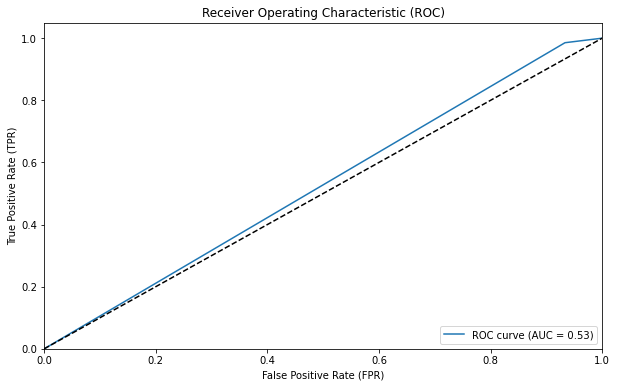

In [165]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Training AUC-Precision-Recall

In [166]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_real_train1, y_pred_proba[:, 1])
auc_score = auc(recall, precision)
print("AUC-Precision-Recall",auc_score)
cm = confusion_matrix(y_real_train1, y_pred)

AUC-Precision-Recall 0.8985062858244933


#### Training Precision-Recall curve

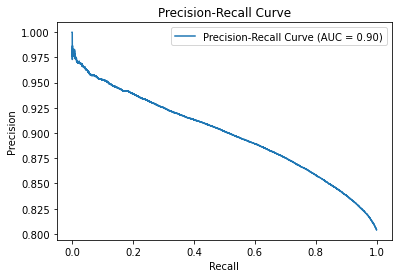

In [167]:
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

#### Training confusion mertic 

Text(0.5, 1.0, 'Confusion Matrix')

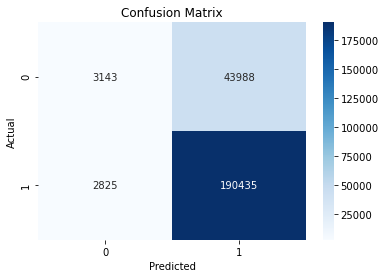

In [168]:
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')


#### Validation SCORE 

In [169]:
y_pred = model.predict(X_valid_final1[a1])
model.score(X_valid_final1[a1],y_valid_final)

0.8039897019569441

#### Validation CLASSIFICATION REPORT

In [170]:
y_pred_proba = model.predict_proba(X_valid_final1[a1])
y_pred_proba[:,1]
threshold = 0.5  # Set the threshold value
y_pred = np.where(y_pred_proba[:, 1] >= threshold, 1, 0)
print(classification_report(y_valid_final,y_pred))

              precision    recall  f1-score   support

           0       0.50      0.07      0.12     12413
           1       0.81      0.98      0.89     50900

    accuracy                           0.80     63313
   macro avg       0.66      0.53      0.50     63313
weighted avg       0.75      0.80      0.74     63313



#### Validation performance metric AUC-ROC

In [171]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_valid_final, y_pred)
auc_score = auc(fpr, tpr)
print("Auc-ROC",auc_score)

Auc-ROC 0.5256744054533106


#### Validation ROC curve

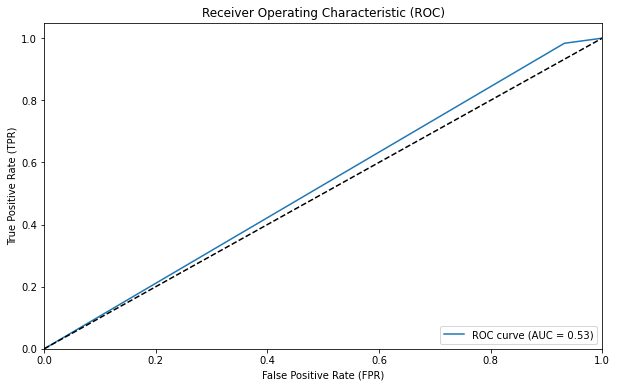

In [172]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### Validation AUC-Precision-Recall

In [173]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_valid_final, y_pred_proba[:, 1])
auc_score = auc(recall, precision)
print("AUC-Precision-Recall",auc_score)
cm = confusion_matrix(y_valid_final, y_pred)

AUC-Precision-Recall 0.8978131383137223


In [174]:
model.coef_

array([[-0.20721215, -0.48297109,  0.06003793,  0.2372337 , -0.08922004,
        -0.23251344, -0.09187266,  0.10754494,  0.09416454]])

#### Validation Precision-Recall curve

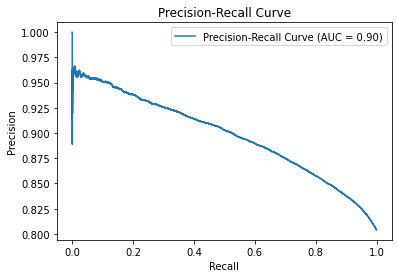

In [175]:
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

#### Validation confusion mertic 

Text(0.5, 1.0, 'Confusion Matrix')

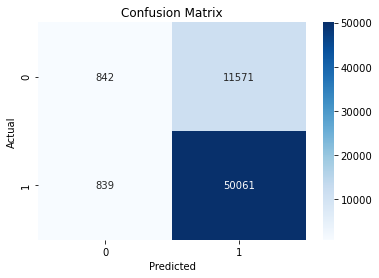

In [176]:

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')


In [177]:
model.coef_[0][0]

-0.2072121463977548

In [178]:
model.coef_

array([[-0.20721215, -0.48297109,  0.06003793,  0.2372337 , -0.08922004,
        -0.23251344, -0.09187266,  0.10754494,  0.09416454]])

In [179]:
a1

['term',
 'int_rate',
 'emp_length',
 'annual_inc',
 'verification_status',
 'dti',
 'open_acc',
 'total_acc',
 'mort_acc']

In [180]:
dict1=dict()
for i in range(len(a1)):
    dict1[a1[i]]=model.coef_[0][i]

#### Feature Importance

In [181]:
dict1

{'term': -0.2072121463977548,
 'int_rate': -0.4829710901592371,
 'emp_length': 0.06003792905339547,
 'annual_inc': 0.2372336987328136,
 'verification_status': -0.08922003806999648,
 'dti': -0.23251344169757626,
 'open_acc': -0.09187265517798339,
 'total_acc': 0.10754493508517739,
 'mort_acc': 0.09416453899539277}

In [182]:
#### feature imprtance with respective weights

In [183]:
sorted_dict = dict(sorted(dict1.items(), key=lambda x: -abs(x[1])))
print(sorted_dict)

{'int_rate': -0.4829710901592371, 'annual_inc': 0.2372336987328136, 'dti': -0.23251344169757626, 'term': -0.2072121463977548, 'total_acc': 0.10754493508517739, 'mort_acc': 0.09416453899539277, 'open_acc': -0.09187265517798339, 'verification_status': -0.08922003806999648, 'emp_length': 0.06003792905339547}


#### int_rate has max weight 

Text(0.5, 1.0, 'Confusion Matrix')

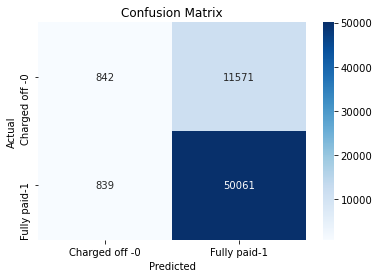

In [184]:

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax,xticklabels=["Charged off -0","Fully paid-1"],yticklabels=["Charged off -0","Fully paid-1"])

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')


### Summary

####  Charged Off    is lablled as 0 and Fully Paid is labbled as 1
#### hence our positive class is Fully Paid 
#### our main aim is to reduce FN and FP which inturn increase Recall and Precission
#### Hence we use harmonic mean of recall and precession which is f1 score 
#### Since the data is hugly imbalance the more rubost performance metric is Recall-precession curve 
#### We achived AUC-Precision-Recall 0.90 for validation data 


#### Tradeoff Questions

### How can we make sure that our model can detect real defaulters and there are less false positives? This is important as we can lose out on an opportunity to finance more individuals and earn interest on it.

##### False positive and false negetive will depend on which class is mentioned as positive and negetive , here we have Fully Paid as positive class and Charged Off as negetive class .
##### for loanTap it is important they should not loose the potental customers which they can provide loan , ie [ ACUTAL =FULLY PAID but model PREDICT =CHARGED OFF]
#### this refers to minimze the FN as much as possible in turn increase the recall (both are same)
#### we have to keep in mind that if we minimize FN or maximize Recall , we have to make a trade off ie ,there might me a chance that LoanTap provide loan to defaulters class or Chargged off class
#### In the confusion metric for validation class recall =0.98 
#### this brings a lot of customers to the LoanTap and increases its profit

### Since NPA (non-performing asset) is a real problem in this industry, it’s important we play safe and shouldn’t disburse loans to anyone

#### for a loan provider compnay like LoanTap , it is not just to maximize number of customer , It needs to take a look into NPA (non-performaning asset ) ie we cannot give loan to all who can default from  loan .
#### To minimize NPA we need to reduce TP or else increase precession metric
#### For minimizing NPA we need to minimize this [ ACUTAL =CHARGED OFF but model PREDICT =FULLY PAID]
#### If we increase the Precession , there is chance that we might loose a potental customer (that is a trade off here)

### conclusion

#### In this problem statement loanTap  needs to increase its customer base and make profit but also be cautious about NPA
#### which is same as it needs to increase RECALL and PRECISSION 
#### So we come up with F1-score which is harmonic mean of recall and precission as performance metric
####  Since the data is hugly imbalance the more rubost performance metric is Recall-precession curve 


#### Questionnaire (Answers should present in the text editor along with insights)

What percentage of customers have fully paid their Loan Amount?

Ans : 80 % of customers have fully paid



Comment about the correlation between Loan Amount and Installment features.

Ans : loan amount is corelated with installment with 0.95



The majority of people have home ownership as _______.

Ans : MORTGAGE



People with grades ‘A’ are more likely to fully pay their loan. (T/F)

Ans : True



Thinking from a bank's perspective, which metric should our primary focus be on..
ROC AUC
Precision
Recall
F1 Score

Ans : It should focous on F1 score and recall-precission curve


How does the gap in precision and recall affect the bank?

Ans : Answered above


Which were the features that heavily affected the outcome?

Ans : int_rate having max weight 


Will the results be affected by geographical location? (Yes/No)

Ans : NO

### FINAL TEST ON UNSEEN DATA

In [185]:
X_test['loan_status']=y_test
x_test_v1=pre_processing_data(X_test.copy())
y_test_final=x_test_v1['loan_status']
x_test_v1.drop(columns=['loan_status'],inplace=True)
x_test_scal=scaler.transform(x_test_v1)
X_test_final1=pd.DataFrame(x_test_scal,columns=x_test_v1.columns)
x_test_final=X_test_final1[COLUMNS]

In [186]:
x_test_final.dropna(inplace=True)

<ipython-input-186-425479de14fd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test_final.dropna(inplace=True)


#### TEST SCORE 

In [187]:
y_pred = model.predict(x_test_final[a1])
model.score(x_test_final[a1],y_test_final)

0.8043967150979153

#### TEST CLASSIFICATION REPORT

In [188]:
y_pred_proba = model.predict_proba(x_test_final[a1])
y_pred_proba[:,1]
threshold = 0.5  # Set the threshold value
y_pred = np.where(y_pred_proba[:, 1] >= threshold, 1, 0)
print(classification_report(y_test_final,y_pred))

              precision    recall  f1-score   support

           0       0.51      0.07      0.12     15524
           1       0.81      0.98      0.89     63626

    accuracy                           0.80     79150
   macro avg       0.66      0.53      0.51     79150
weighted avg       0.75      0.80      0.74     79150



#### TEST performance metric AUC-ROC

In [189]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test_final, y_pred)
auc_score = auc(fpr, tpr)
print("Auc-ROC",auc_score)

Auc-ROC 0.5263599590650897


#### TEST ROC curve

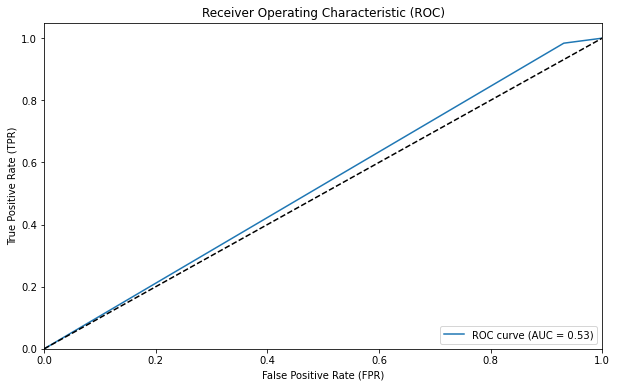

In [190]:
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal reference line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

#### TEST AUC-Precision-Recall

In [191]:
from sklearn.metrics import precision_recall_curve, auc
precision, recall, _ = precision_recall_curve(y_test_final, y_pred_proba[:, 1])
auc_score = auc(recall, precision)
print("AUC-Precision-Recall",auc_score)
cm = confusion_matrix(y_test_final, y_pred)

AUC-Precision-Recall 0.8976521928530494


#### TEST Precision-Recall curve

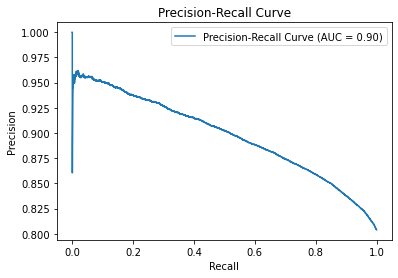

In [192]:
plt.plot(recall, precision, label='Precision-Recall Curve (AUC = {:.2f})'.format(auc_score))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

#### TEST confusion mertic

Text(0.5, 1.0, 'Confusion Matrix')

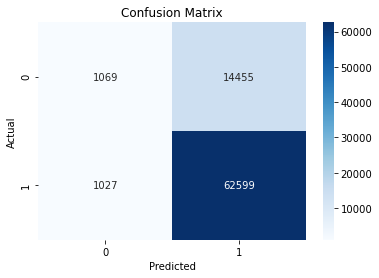

In [193]:

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')

Text(0.5, 1.0, 'Confusion Matrix')

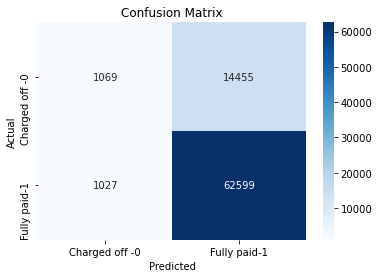

In [194]:

fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax,xticklabels=["Charged off -0","Fully paid-1"],yticklabels=["Charged off -0","Fully paid-1"])

ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion Matrix')


### Actionable Insights & Recommendations

#### LoanTap need to use f1 -score as perfoemce metric because we need to max both recall and precission
#### Due to heavy Imbalance data we use Prec-recall curve and Auc as other performance metric
#### LoanTap is a new age loan provider it needs to maximize its customer base by increasing recall 
#### Interest_rate , DTI is the main features which helps in predecting
#### Insigts about features are given in EDA part
#### Training f1=  0.89       , Valid f1=    0.89         , Test f1=0.89
#### Training Recal-prec auc = .90       ,Valid Recal-prec auc=  0.89      ,Test Recal-prec auc=0.89
#### There is no data leakage during the model building
#### Business insights are given in the form of Q and A in above .